In [1]:
#!/usr/bin/env python
import numpy as np
from astropy.io import fits
import pylab as pl
import aplpy
import matplotlib
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# Font properties
# Note: TNR required for bolding due to font manager bug
# Math font for compact, times-like scientific notation
# Exit out of notebook before changing
times_font=True
if times_font:
    font_bold = fm.FontProperties(family='Times New Roman', style='normal', size=14, weight='bold', stretch='normal')
    font      = fm.FontProperties(family='Times', style='normal', size=14, weight='normal', stretch='normal')
    font_name ='Times'
    plt.rcParams["mathtext.fontset"] = "stixsans"
else:
    font_name ='Dejavu Sans'
    font_bold = fm.FontProperties(family='Dejavu Sans', style='normal', size=14, weight='bold', stretch='normal')
    font      = fm.FontProperties(family='Dejavu Sans', style='normal', size=14, weight='normal', stretch='normal')

#import matplotlib as mpl
#from matplotlib.colors import ListedColormap
from matplotlib import colors
from colormaps import spectral
import warnings
warnings.filterwarnings("ignore")

from matplotlib.colors import ColorConverter
ColorConverter.colors['e']=(94/256, 79/256, 162/256)
ColorConverter.colors['g']=(50/256, 136/256, 189/256)
ColorConverter.colors['h']=(102/256, 194/256, 165/256)
ColorConverter.colors['i']=(253/256, 174/256, 97/256)
ColorConverter.colors['j']=(219/256, 55/256, 82/256)

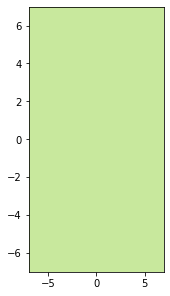

In [2]:
####
#### An attempt at using matplotlib, which looks awful. However, it makes a nice color 
#### bar that I can use later....
#### Data is a placeholder
#### Required for all plots

#dir_fits = '/Volumes/T7/MWA/data/beam_fits/old/' 
# beam_gaussian_decomp=1   fwhm_gauss_beam=0    fft_beam=1  ---> 101
#d_type = ['100','110','101']
#mask_type = ['1000','1000','1000']
#fitslist = [dir_fits+'beam_'+d_type[0]+'_'+mask_type[0]+'.fits',
#            dir_fits+'beam_'+d_type[1]+'_'+mask_type[1]+'.fits',
#            dir_fits+'beam_'+d_type[2]+'_'+mask_type[2]+'.fits']
#kernel_names = ['Analytic Gaussian decomposition','Analytic matched-FWHM Gaussian',
#                'FFT of Gaussian Decomposition']

cb_spec, cb_spec_r = spectral()

N = 1400
u = np.arange(-N/2*.5/50, N/2*.5/50, .5/50)
v = np.arange(-N/2*.5/50, N/2*.5/50, .5/50)
vmax_image=1
vmin_image=1e-5
vmax_uv_amp=1.4e-5#.035
vmin_uv_amp=4e-13#1e-9
vmax_uv_phase=np.pi
vmin_uv_phase=-np.pi

fig = pl.figure(constrained_layout=True)
spec = fig.add_gridspec(ncols=3, nrows=1)

#for col_i in range(3):
col_i=0    
#kernel = fits.getdata(fitslist[col_i])
#print(np.min(kernel[np.nonzero(kernel)]))
#print(np.max(kernel))
zero_arr = np.zeros((N, N))
    
fx = pl.subplot(spec[col_i])
pcm_image = fx.pcolor(u, v, zero_arr,norm=colors.LogNorm(vmin=vmin_image, vmax=vmax_image),
                cmap=cb_spec)#'Spectral_r')
pcm_uv_amp = fx.pcolor(u, v, zero_arr,norm=colors.LogNorm(vmin=vmin_uv_amp, vmax=vmax_uv_amp),
                cmap=cb_spec)#'Spectral_r')
pcm_uv_gray = fx.pcolor(u, v, zero_arr,norm=colors.LogNorm(vmin=vmin_uv_amp, vmax=vmax_uv_amp),
                cmap='gray')#'Spectral_r')
pcm_uv_phase = fx.pcolor(u, v, zero_arr,vmin=vmin_uv_phase, vmax=vmax_uv_phase,
                       cmap=cb_spec)#'Spectral_r'
    

In [3]:
#Directory info
dir_fits = '/Volumes/T7/MWA/data/beam_fits/vol_norm_1/' 

## Shows full extent beams for gauss, half, and fwhm
## Full panels and individual rows
d_type = ['1000','1001','1100']
mask_type = ['100','100','100']
key = 'large'

## Colored stamps on a grey background. 
## mask_type only used for creating header files, needs to be rerun until all are made
#d_type = ['1000','1001','1100']
#mask_type = ['1000000000','2000000000','1410065408'] #full 1e9
#key = 'large'

## Include the horizon and compare analytic convolve vs fft
#d_type = ['1000','1010','1010','1010']
#mask_type = ['60','60','600','1200']
#key = 'large_horizon'

## Instrument compare, low res
#d_type = ['1000','1001','1100']
#no mask type
#key = 'large'


In [11]:
##
## Change the headers of the fits files to be aplpy compatible
## Required for all plots. Needs to only be done once to generate .header.fits files

##
# beam_gaussian_decomp=1   fwhm_gauss_beam=0    fft_beam=1   half_sidelobes=0 ---> 1010
##


fitslist = [dir_fits+'beam_abs_'+key+'_'+d_type[0]+'_'+mask_type[0]+'.fits',
            dir_fits+'beam_abs_'+key+'_'+d_type[1]+'_'+mask_type[1]+'.fits',
            dir_fits+'beam_abs_'+key+'_'+d_type[2]+'_'+mask_type[2]+'.fits',
            dir_fits+'beam_phase_'+key+'_'+d_type[0]+'_'+mask_type[0]+'.fits',
            dir_fits+'beam_phase_'+key+'_'+d_type[1]+'_'+mask_type[1]+'.fits',
            dir_fits+'beam_phase_'+key+'_'+d_type[2]+'_'+mask_type[2]+'.fits']
fitslist_image = [dir_fits+'beam_image_'+key+'_'+d_type[0]+'.fits']#,
            #dir_fits+'beam_image_'+key+'_'+d_type[1]+'.fits',
            #dir_fits+'beam_image_'+key+'_'+d_type[2]+'.fits']


psf_dim=60#28
psf_image_resolution=10
psf_resolution=250#50
#psf_intermediate_res=8
#psf_image_dim=psf_dim*psf_image_resolution*psf_intermediate_res

N_pix_uv = psf_dim*psf_resolution
uv_delta = .5/psf_resolution
lm_delta = 1/300#1/140 #1/(pix_hor/2)
N_pix_lm = 780 #9600 #364

norm = 2500.0000000045475 #Necessary in some uv-amp to make vol normalised to 1..

for f in fitslist:
    #
    #Reset the WCS grid to the desired uv-grid
    #
    fh = fits.getheader(f)
    fd = fits.getdata(f)
    if "abs" in f:
        fd = fd / norm

    hitems = ['PC1_3','PC1_4','PC2_3','PC2_4','PC3_1','PC3_2','PC3_3','PC3_4','PC4_1','PC4_2','PC4_3','PC4_4',\
        'CRPIX4','CDELT4','CRVAL4','CTYPE4','CRPIX3','CDELT3','CRVAL3','CTYPE3','CUNIT3','NAXIS4','NAXIS3','CUNIT4']
    for hi in hitems:
        #
        #Remove any previous WCS defined keywords
        try:
            fh.remove(hi)
        except:
            pass
    #Set new WCS grid to uv grid
    fh.set('NAXIS1',N_pix_uv)
    fh.set('NAXIS2',N_pix_uv)
    fh.set('WCSAXES',2)
    fh.set('CD1_1',uv_delta)
    fh.set('CD2_2',uv_delta)
    fh.set('CD2_1',0)
    fh.set('CD1_2',0)
    fh.set('CRPIX1',N_pix_uv/2-1)
    fh.set('CRPIX2',N_pix_uv/2-1)
    fh.set('CRVAL1',0)
    fh.set('CRVAL2',0)   
    fh.set('CTYPE1','UU')
    fh.set('CTYPE2','VV')  

    fits.writeto(f.replace('.fits','.header.fits'),\
        fd[:,:], header=fh, overwrite=True)
    
    print('UV max/min')
    print(np.min(fd[np.nonzero(fd)]))
    print(np.max(fd))
    
for f in fitslist_image:
    #
    #Reset the WCS grid to the desired uv-grid
    #
    fh = fits.getheader(f)
    fd = fits.getdata(f)

    hitems = ['PC1_3','PC1_4','PC2_3','PC2_4','PC3_1','PC3_2','PC3_3','PC3_4','PC4_1','PC4_2','PC4_3','PC4_4',\
        'CRPIX4','CDELT4','CRVAL4','CTYPE4','CRPIX3','CDELT3','CRVAL3','CTYPE3','CUNIT3','NAXIS4','NAXIS3','CUNIT4']
    for hi in hitems:
        #
        #Remove any previous WCS defined keywords
        try:
            fh.remove(hi)
        except:
            pass
    #Set new WCS grid to uv grid
    fh.set('NAXIS1',N_pix_lm)
    fh.set('NAXIS2',N_pix_lm)
    fh.set('WCSAXES',2)
    fh.set('CD1_1',lm_delta)
    fh.set('CD2_2',lm_delta)
    fh.set('CD2_1',0)
    fh.set('CD1_2',0)
    fh.set('CRPIX1',N_pix_lm/2-1)
    fh.set('CRPIX2',N_pix_lm/2-1)
    fh.set('CRVAL1',0)
    fh.set('CRVAL2',0)   
    fh.set('CTYPE1','UU')
    fh.set('CTYPE2','VV')  

    fits.writeto(f.replace('.fits','.header.fits'),\
        fd[:,:], header=fh, overwrite=True)
    
    print('Image max/min')
    print(np.min(fd[np.nonzero(fd)]))
    print(np.max(fd))

UV max/min
2.6265266588236653e-13
1.342268832190636e-05
UV max/min
1.3132648147157055e-13
1.3562036318834577e-05
UV max/min
8.925426861396217e-88
1.3169344263157985e-05
UV max/min
-3.141592646134404
3.141592646134404
UV max/min
-3.1415926512462704
3.1415926512462704
UV max/min
-0.33847696344447076
0.33852204096553434
Image max/min
1.510357604577049e-34
0.9992449566040593


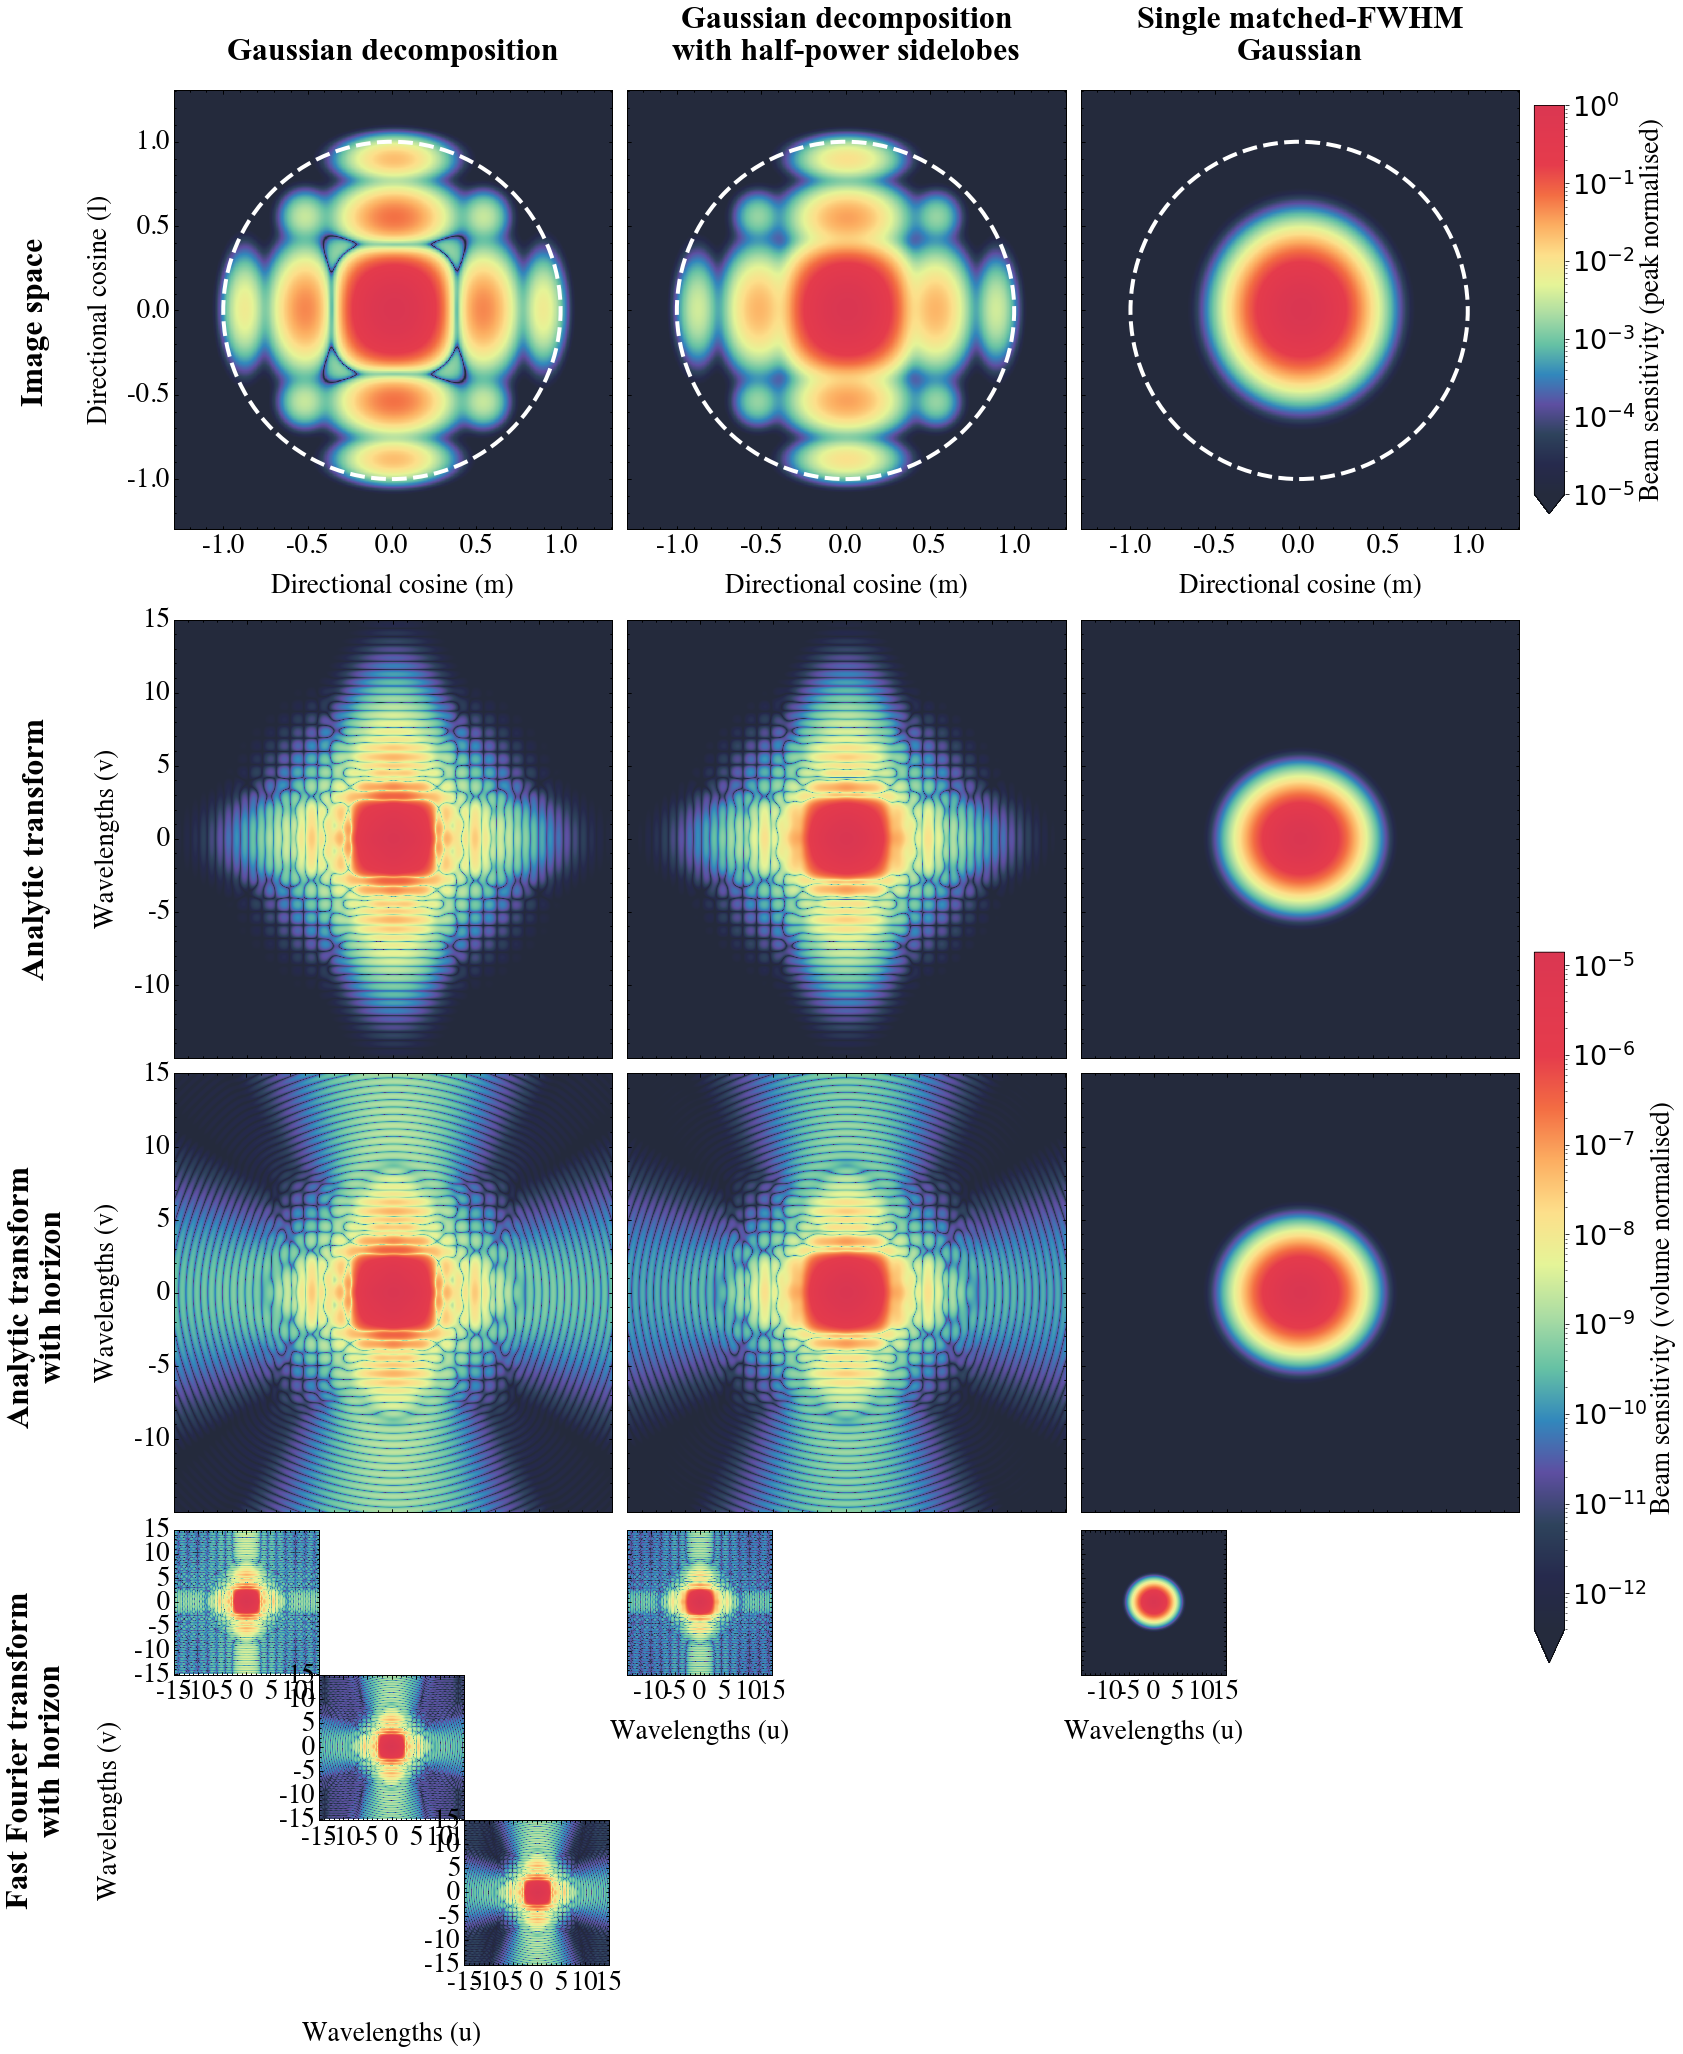

In [7]:
#FULL PANEL with horizon contributions
key = 'large'
res_type = ['60','600','1200']
d_type_fft = ['1010','1011','1110']

fitslist = [dir_fits+'beam_abs_'+key+'_'+d_type[0]+'_'+mask_type[0]+'.header.fits',
            dir_fits+'beam_abs_'+key+'_'+d_type[1]+'_'+mask_type[1]+'.header.fits',
            dir_fits+'beam_abs_'+key+'_'+d_type[2]+'_'+mask_type[2]+'.header.fits',
            dir_fits+'beam_abs_'+key+'_horizon_'+d_type[0]+'_'+res_type[0]+'.header.fits',
            dir_fits+'beam_abs_'+key+'_horizon_'+d_type[1]+'_'+res_type[0]+'.header.fits',
            dir_fits+'beam_abs_'+key+'_horizon_'+d_type[2]+'_'+res_type[0]+'.header.fits',
            dir_fits+'beam_abs_'+key+'_horizon_'+d_type_fft[0]+'_'+res_type[0]+'.header.fits',
            dir_fits+'beam_abs_'+key+'_horizon_'+d_type_fft[1]+'_'+res_type[0]+'.header.fits',
            dir_fits+'beam_abs_'+key+'_horizon_'+d_type_fft[2]+'_'+res_type[0]+'.header.fits',
            dir_fits+'beam_abs_'+key+'_horizon_'+d_type_fft[0]+'_'+res_type[1]+'.header.fits',
            dir_fits+'beam_abs_'+key+'_horizon_'+d_type_fft[1]+'_'+res_type[1]+'.header.fits',
            dir_fits+'beam_abs_'+key+'_horizon_'+d_type_fft[2]+'_'+res_type[1]+'.header.fits',
            dir_fits+'beam_abs_'+key+'_horizon_'+d_type_fft[0]+'_'+res_type[2]+'.header.fits',
            dir_fits+'beam_abs_'+key+'_horizon_'+d_type_fft[1]+'_'+res_type[2]+'.header.fits',
            dir_fits+'beam_abs_'+key+'_horizon_'+d_type_fft[2]+'_'+res_type[2]+'.header.fits']
fitslist_image = [dir_fits+'beam_image_'+key+'_'+d_type[0]+'.header.fits',
            dir_fits+'beam_image_'+key+'_'+d_type[1]+'.header.fits',
            dir_fits+'beam_image_'+key+'_'+d_type[2]+'.header.fits']
kernel_names = ['Gaussian decomposition','Gaussian decomposition with half-power sidelobes',
                'Single matched-FWHM Gaussian']
plot_save_name = 'panel_highres_font_vol1.pdf'

cmap_image=cb_spec#'Spectral_r'#'gnuplot2'#
cmap_uv_amp=cb_spec
cmap_uv_phase=cb_spec
vmax_image=1
vmin_image=1e-5
vmax_uv_amp=1.4e-5 #.035
vmin_uv_amp=4e-13#1e-9
vmax_uv_phase=np.pi
vmin_uv_phase=-np.pi

#[xmin, ymin, dx, dy]

xmin1=0.1
xmin2=.4
xmin3=.7
whitespace=0.05
ymin1=.7+whitespace
ymin2=.4
ymin3=.1
ymin4=-.2

subplot_loc_11 = [xmin1,ymin1,0.29,.29]
subplot_loc_12 = [xmin2,ymin1,0.29,.29]
subplot_loc_13 = [xmin3,ymin1,0.29,.29]

subplot_loc_21 = [xmin1,ymin2,0.29,.29]
subplot_loc_22 = [xmin2,ymin2,0.29,.29]
subplot_loc_23 = [xmin3,ymin2,0.29,.29]

subplot_loc_31 = [xmin1,ymin3,0.29,.29]
subplot_loc_32 = [xmin2,ymin3,0.29,.29]
subplot_loc_33 = [xmin3,ymin3,0.29,.29]

subplot_loc_41 = [xmin1,ymin4+0.096*2,0.096,0.096]
subplot_loc_42 = [xmin2,ymin4+0.096*2,0.096,0.096]
subplot_loc_43 = [xmin3,ymin4+0.096*2,0.096,0.096]

subplot_loc_51 = [xmin1+0.096,ymin4+0.096,0.096,0.096]
subplot_loc_52 = [xmin2+0.096,ymin4+0.096,0.096,0.096]
subplot_loc_53 = [xmin3+0.096,ymin4+0.096,0.096,0.096]

subplot_loc_61 = [xmin1+0.096*2,ymin4,0.096,0.096]
subplot_loc_62 = [xmin2+0.096*2,ymin4,0.096,0.096]
subplot_loc_63 = [xmin3+0.096*2,ymin4,0.096,0.096]

font_size_axis = 27#22 (default font)
font_size_title = 32#25 (default font)
title_pad = 30 #in points

Timesfont_bold=matplotlib.font_manager.FontProperties(family='Times New Roman', style='normal', size=12, weight='bold', stretch='normal')
Timesfont=matplotlib.font_manager.FontProperties(family='Times', style='normal', size=12, weight='normal', stretch='normal')
ticks_font = matplotlib.font_manager.FontProperties(family='Times', style='normal', size=12, weight='normal', stretch='normal')


# Plot a 3x6 Figure
fig = pl.figure(figsize=(21,21))

#Top left - Image control
f1 = aplpy.FITSFigure(fitslist_image[0], figure=fig, subplot=subplot_loc_11)
f1.show_colorscale(cmap=cmap_image, stretch='log',vmin=vmin_image,vmax=vmax_image)
f1.axis_labels.set_ytext('Directional cosine (l)')
f1.axis_labels.set_xtext('Directional cosine (m)')
f1.axis_labels.set_font(family=font_name,size=font_size_axis)
f1.tick_labels.set_font(family=font_name,size=font_size_axis)
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')
f1.set_title('Gaussian decomposition',size=font_size_title,pad=title_pad,fontproperties=font_bold)
f1.show_circles(0, 0, 1,edgecolor='white',linewidth=4,linestyle='dashed')

#Top middle - uv amp control
f2 = aplpy.FITSFigure(fitslist[0], figure=fig, subplot=subplot_loc_21)
f2.show_colorscale(cmap=cmap_uv_amp, stretch='log',vmin=vmin_uv_amp,vmax=vmax_uv_amp)
f2.axis_labels.set_ytext('Wavelengths (v)')
f2.axis_labels.set_xtext('Wavelengths (u)')
f2.axis_labels.set_font(family=font_name,size=font_size_axis)
f2.tick_labels.set_font(family=font_name,size=font_size_axis)
f2.axis_labels.hide_x()
f2.tick_labels.hide_x()
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')

#Top right - uv phase control
f3 = aplpy.FITSFigure(fitslist[3], figure=fig, subplot=subplot_loc_31)
f3.show_colorscale(cmap=cmap_uv_amp, stretch='log',vmin=vmin_uv_amp,vmax=vmax_uv_amp)
f3.axis_labels.set_ytext('Wavelengths (v)')
f3.axis_labels.set_xtext('Wavelengths (u)')
f3.axis_labels.set_font(family=font_name,size=font_size_axis)
f3.tick_labels.set_font(family=font_name,size=font_size_axis)
f3.axis_labels.hide_x()
f3.tick_labels.hide_x()
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')

#Top right - uv phase control
f3 = aplpy.FITSFigure(fitslist[6], figure=fig, subplot=subplot_loc_41)
f3.show_colorscale(cmap=cmap_uv_amp, stretch='log',vmin=vmin_uv_amp,vmax=vmax_uv_amp)
#f3.axis_labels.set_ytext('Wavelengths (v)')
#f3.axis_labels.set_xtext('Wavelengths (u)')
f3.axis_labels.hide_y()
f3.axis_labels.hide_x()
f3.axis_labels.set_font(family=font_name,size=font_size_axis)
f3.tick_labels.set_font(family=font_name,size=font_size_axis)
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')
a.set_xticks([-15,0,15])
a.set_yticks([-15,0,15])

#Top right - uv phase control
f3 = aplpy.FITSFigure(fitslist[9], figure=fig, subplot=subplot_loc_51)
f3.show_colorscale(cmap=cmap_uv_amp, stretch='log',vmin=vmin_uv_amp,vmax=vmax_uv_amp)
#f3.axis_labels.set_ytext('Wavelengths (v)')
#f3.axis_labels.set_xtext('Wavelengths (u)')
f3.axis_labels.hide_y()
f3.axis_labels.hide_x()
f3.axis_labels.set_font(family=font_name,size=font_size_axis)
f3.tick_labels.set_font(family=font_name,size=font_size_axis)
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')
a.set_xticks([-15,0,15])
a.set_yticks([-15,0])

#Top right - uv phase control
f3 = aplpy.FITSFigure(fitslist[12], figure=fig, subplot=subplot_loc_61)
f3.show_colorscale(cmap=cmap_uv_amp, stretch='log',vmin=vmin_uv_amp,vmax=vmax_uv_amp)
#f3.axis_labels.set_ytext('Wavelengths (v)')
#f3.axis_labels.set_xtext('Wavelengths (u)')
f3.axis_labels.hide_y()
f3.axis_labels.hide_x()
f3.axis_labels.set_font(family=font_name,size=font_size_axis)
f3.tick_labels.set_font(family=font_name,size=font_size_axis)
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')
a.set_xticks([-15,0,15])
a.set_yticks([-15,0])

#Middle left - Image 50%
f1 = aplpy.FITSFigure(fitslist_image[1], figure=fig, subplot=subplot_loc_12)
f1.show_colorscale(cmap=cmap_image, stretch='log',vmin=vmin_image,vmax=vmax_image)
f1.axis_labels.set_ytext('Directional cosine (l)')
f1.axis_labels.set_xtext('Directional cosine (m)')
f1.axis_labels.set_font(family=font_name,size=font_size_axis)
f1.tick_labels.set_font(family=font_name,size=font_size_axis)
f1.axis_labels.hide_y()
f1.tick_labels.hide_y()
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')
f1.show_circles(0, 0, 1,edgecolor='white',linewidth=4,linestyle='dashed')
f1.set_title('Gaussian decomposition\nwith half-power sidelobes',size=font_size_title,pad=title_pad,fontproperties=font_bold)


#Middle middle - uv amp 50%
f2 = aplpy.FITSFigure(fitslist[1], figure=fig, subplot=subplot_loc_22)
f2.show_colorscale(cmap=cmap_uv_amp, stretch='log',vmin=vmin_uv_amp,vmax=vmax_uv_amp)
f2.axis_labels.set_ytext('Wavelengths (v)')
f2.axis_labels.set_xtext('Wavelengths (u)')
f2.axis_labels.set_font(family=font_name,size=font_size_axis)
f2.tick_labels.set_font(family=font_name,size=font_size_axis)
f2.axis_labels.hide_x()
f2.tick_labels.hide_x()
f2.axis_labels.hide_y()
f2.tick_labels.hide_y()
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')

#Middle right - uv phase 50%
f3 = aplpy.FITSFigure(fitslist[4], figure=fig, subplot=subplot_loc_32)
f3.show_colorscale(cmap=cmap_uv_amp, stretch='log',vmin=vmin_uv_amp,vmax=vmax_uv_amp)
f3.axis_labels.set_ytext('Wavelengths (v)')
f3.axis_labels.set_xtext('Wavelengths (u)')
f3.axis_labels.set_font(family=font_name,size=font_size_axis)
f3.tick_labels.set_font(family=font_name,size=font_size_axis)
f3.axis_labels.hide_y()
f3.tick_labels.hide_y()
f3.axis_labels.hide_x()
f3.tick_labels.hide_x()
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')

#Middle right - uv phase 50%
f3 = aplpy.FITSFigure(fitslist[7], figure=fig, subplot=subplot_loc_42)
f3.show_colorscale(cmap=cmap_uv_amp, stretch='log',vmin=vmin_uv_amp,vmax=vmax_uv_amp)
f3.axis_labels.set_ytext('Wavelengths (v)')
f3.axis_labels.set_xtext('Wavelengths (u)')
f3.axis_labels.set_font(family=font_name,size=font_size_axis)
f3.tick_labels.set_font(family=font_name,size=font_size_axis)
f3.axis_labels.hide_y()
f3.tick_labels.hide_y()
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')

#Bottom left - Image fwhm
f1 = aplpy.FITSFigure(fitslist_image[2], figure=fig, subplot=subplot_loc_13)
f1.show_colorscale(cmap=cmap_image, stretch='log',vmin=vmin_image,vmax=vmax_image)
f1.axis_labels.set_ytext('Directional cosine (l)')
f1.axis_labels.set_xtext('Directional cosine (m)')
f1.axis_labels.set_font(family=font_name,size=font_size_axis)
f1.tick_labels.set_font(family=font_name,size=font_size_axis)
f1.axis_labels.hide_y()
f1.tick_labels.hide_y()
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')
f1.show_circles(0, 0, 1,edgecolor='white',linewidth=4,linestyle='dashed')
f1.set_title('Single matched-FWHM\nGaussian',size=font_size_title,pad=title_pad,fontproperties=font_bold)

#Bottom middle - uv amp fwhm
f2 = aplpy.FITSFigure(fitslist[2], figure=fig, subplot=subplot_loc_23)
f2.show_colorscale(cmap=cmap_uv_amp, stretch='log',vmin=vmin_uv_amp,vmax=vmax_uv_amp)
f2.axis_labels.set_ytext('Wavelengths (v)')
f2.axis_labels.set_xtext('Wavelengths (u)')
f2.axis_labels.set_font(family=font_name,size=font_size_axis)
f2.tick_labels.set_font(family=font_name,size=font_size_axis)
f2.axis_labels.hide_x()
f2.tick_labels.hide_x()
f2.axis_labels.hide_y()
f2.tick_labels.hide_y()
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')

#Bottom right - uv phase fwhm
f3 = aplpy.FITSFigure(fitslist[5], figure=fig, subplot=subplot_loc_33)
f3.show_colorscale(cmap=cmap_uv_amp, stretch='log',vmin=vmin_uv_amp,vmax=vmax_uv_amp)
f3.axis_labels.set_ytext('Wavelengths (v)')
f3.axis_labels.set_xtext('Wavelengths (u)')
f3.axis_labels.set_font(family=font_name,size=font_size_axis)
f3.tick_labels.set_font(family=font_name,size=font_size_axis)
f3.axis_labels.hide_y()
f3.tick_labels.hide_y()
f3.axis_labels.hide_x()
f3.tick_labels.hide_x()
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')

#Bottom right - uv phase fwhm
f3 = aplpy.FITSFigure(fitslist[8], figure=fig, subplot=subplot_loc_43)
f3.show_colorscale(cmap=cmap_uv_amp, stretch='log',vmin=vmin_uv_amp,vmax=vmax_uv_amp)
f3.axis_labels.set_ytext('Wavelengths (v)')
f3.axis_labels.set_xtext('Wavelengths (u)')
f3.axis_labels.set_font(family=font_name,size=font_size_axis)
f3.tick_labels.set_font(family=font_name,size=font_size_axis)
f3.axis_labels.hide_y()
f3.tick_labels.hide_y()
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')

#[left, bottom, right, top]
#pl.tight_layout(rect=[0, 0, .7, .7])
#pl.subplots_adjust(right=0.85)


#Image space bar
#[left, bottom, width, height]
cbar_ax1 = fig.add_axes([xmin3+.3, ymin1+0.01, 0.02,0.27])
cbar1 = pl.colorbar(pcm_image, cax=cbar_ax1,extend='min',orientation="vertical")
cbar_ax1.invert_xaxis()
cbar1.set_label(label='Beam sensitivity (peak normalised)',size=font_size_axis,fontproperties=font)
for tick in cbar_ax1.xaxis.majorTicks:
    tick.label1.set_fontproperties(font)
cbar_ax1.tick_params(labelsize=font_size_axis)

#UV amp space bar
#[left, bottom, width, height]
cbar_ax2 = fig.add_axes([xmin3+.3, ymin3-0.1, 0.02, 0.47])
cbar2 = pl.colorbar(pcm_uv_amp, cax=cbar_ax2,extend='min',orientation="vertical")
cbar_ax2.invert_xaxis()
cbar2.set_label(label='Beam sensitivity (volume normalised)',size=font_size_axis,fontproperties=font)
for tick in cbar_ax2.xaxis.majorTicks:
    tick.label1.set_fontproperties(font)
cbar_ax2.tick_params(labelsize=font_size_axis)

#UV phase space bar
#[left, bottom, width, height]
# cbar_ax3 = fig.add_axes([xmin3+.3, ymin3+0.01, 0.02, 0.27])
# cbar3 = pl.colorbar(pcm_uv_phase, cax=cbar_ax3,orientation="vertical",ticks=[-np.pi, 0, np.pi])
# cbar3.set_label(label='Beam phase',size=font_size_axis,fontproperties=font,labelpad=3)
# cbar_ax3.set_yticklabels([r'-$\pi$', '0', r'$\pi$'])
# for tick in cbar_ax3.xaxis.majorTicks:
#     tick.label1.set_fontproperties(font)
# cbar_ax3.tick_params(labelsize=font_size_axis)

#Add labels
#label_ax = fig.add_axes([0,0,1,1])
fig.text(0, .836, 'Image space',rotation='vertical',fontsize=font_size_title,fontproperties=font_bold)
#fig.text(-0.01, .435, 'Gaussian decomposition\nwith half-power sidelobes',rotation='vertical',
#         fontsize=font_size_title,multialignment='center',fontproperties=font_bold)
fig.text(0, .456, 'Analytic transform',rotation='vertical',
         fontsize=font_size_title,multialignment='center',fontproperties=font_bold)
fig.text(-0.01, .16, 'Analytic transform\nwith horizon',rotation='vertical',
         multialignment='center',fontsize=font_size_title,fontproperties=font_bold)
fig.text(-0.01, -.158, 'Fast Fourier transform\nwith horizon',rotation='vertical',
         multialignment='center',fontsize=font_size_title,fontproperties=font_bold)

fig.text(.05, -.153, 'Wavelengths (v)',rotation='vertical',
         multialignment='center',fontsize=font_size_axis,fontproperties=font)
fig.text((.29+.1)/2-0.01, -.25, 'Wavelengths (u)',rotation='horizontal',
         multialignment='center',fontsize=font_size_axis,fontproperties=font)

#Add FT arrows (x, y, dx, dy)
#f3.show_arrows(.3, .8, .1, .03)


pl.savefig(dir_fits+plot_save_name, bbox_inches='tight', dpi=128)

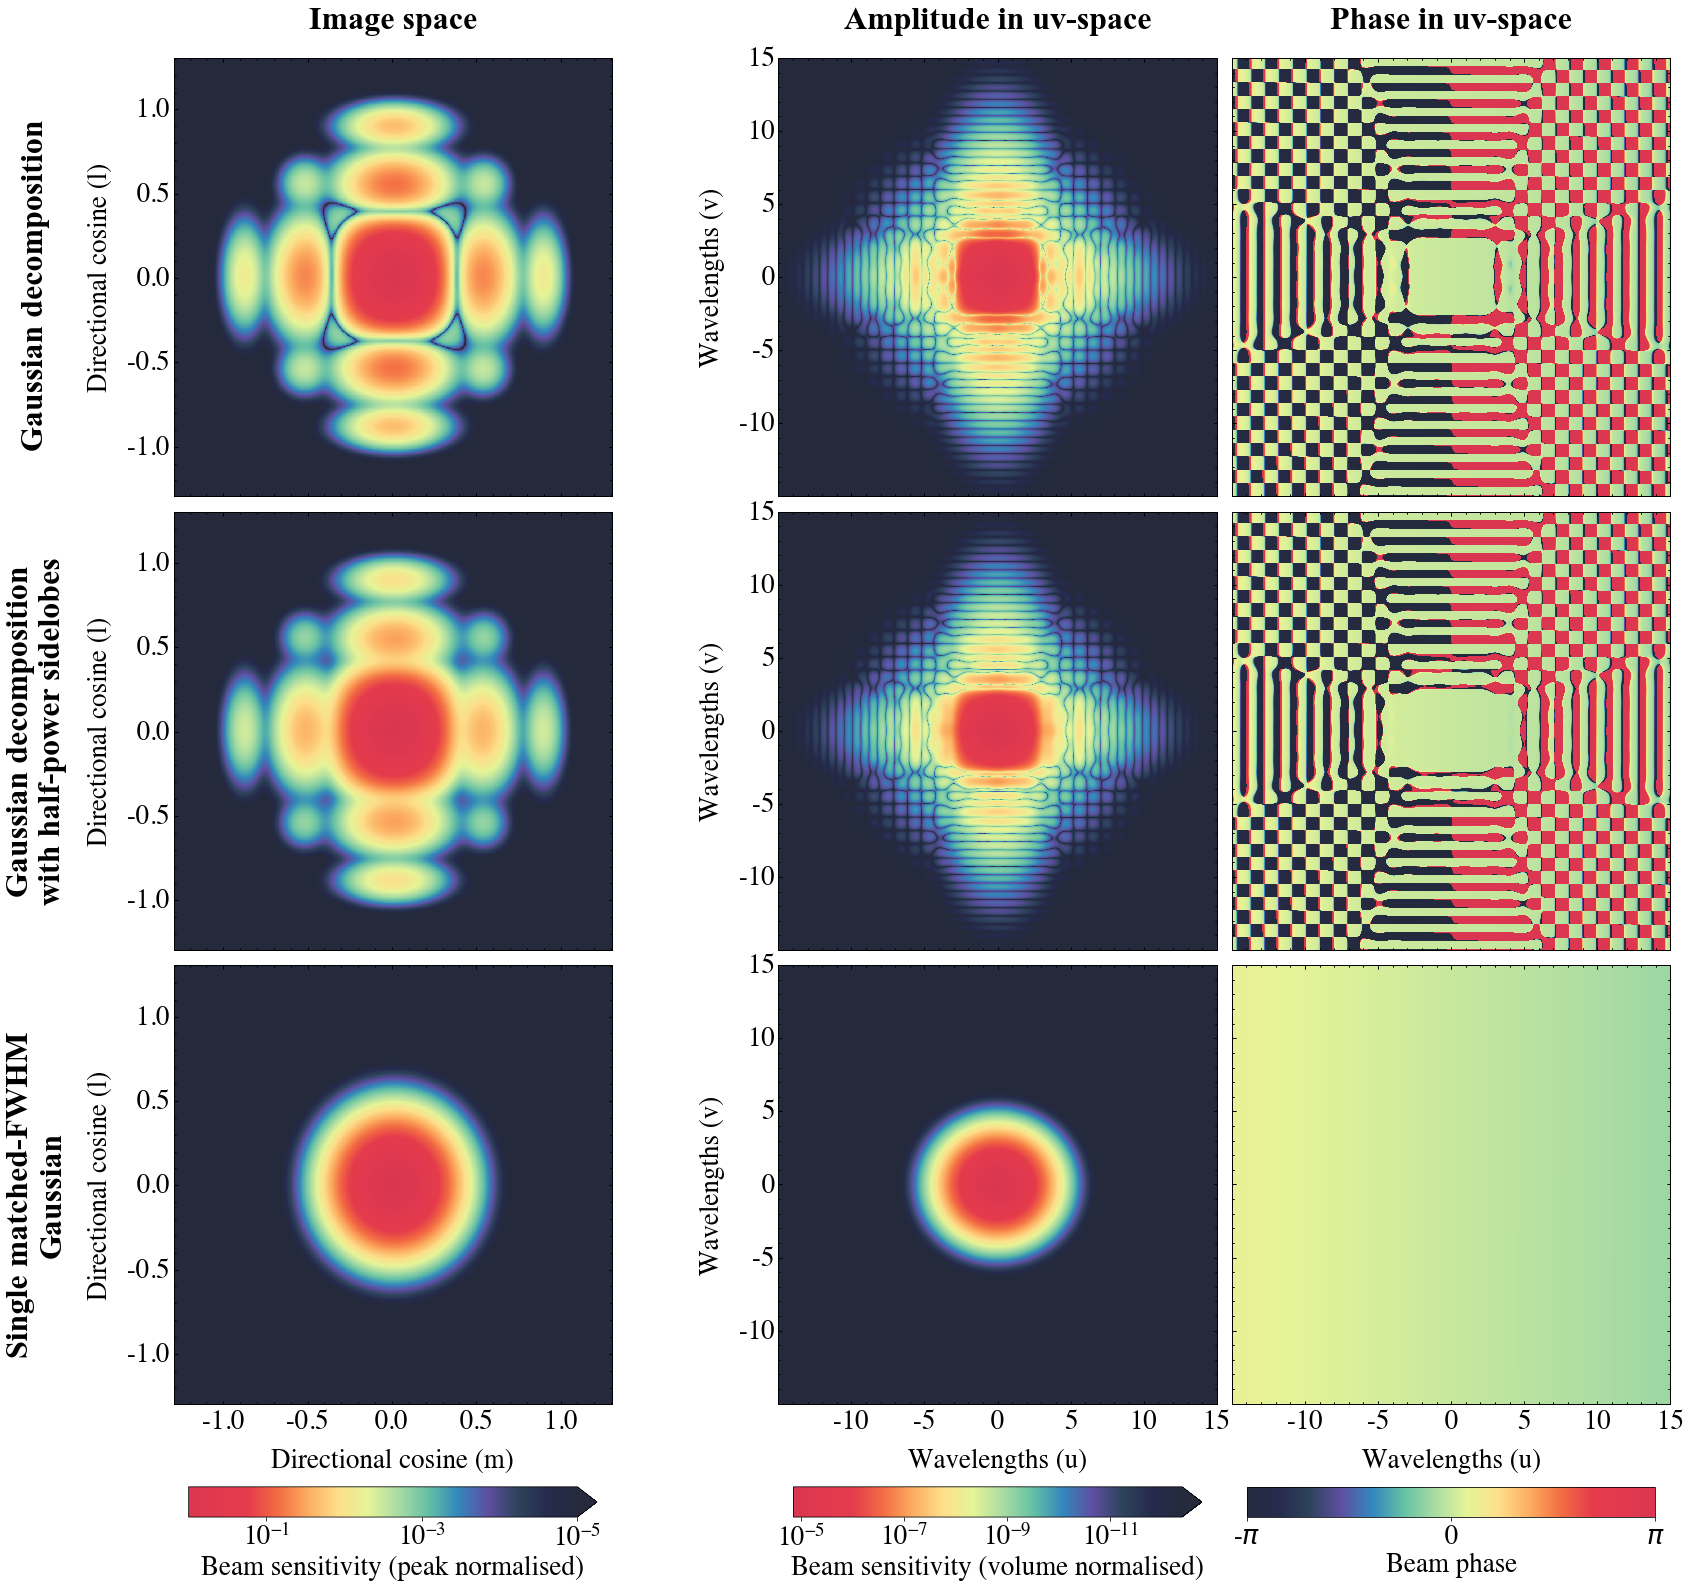

In [10]:
#FULL PANEL
key = 'large'

fitslist = [dir_fits+'beam_abs_'+key+'_'+d_type[0]+'_'+mask_type[0]+'.header.fits',
            dir_fits+'beam_abs_'+key+'_'+d_type[1]+'_'+mask_type[1]+'.header.fits',
            dir_fits+'beam_abs_'+key+'_'+d_type[2]+'_'+mask_type[2]+'.header.fits',
            dir_fits+'beam_phase_'+key+'_'+d_type[0]+'_'+mask_type[0]+'.header.fits',
            dir_fits+'beam_phase_'+key+'_'+d_type[1]+'_'+mask_type[1]+'.header.fits',
            dir_fits+'beam_phase_'+key+'_'+d_type[2]+'_'+mask_type[2]+'.header.fits']
fitslist_image = [dir_fits+'beam_image_'+key+'_'+d_type[0]+'.header.fits',
            dir_fits+'beam_image_'+key+'_'+d_type[1]+'.header.fits',
            dir_fits+'beam_image_'+key+'_'+d_type[2]+'.header.fits']
kernel_names = ['Gaussian decomposition','Gaussian decomposition with half-power sidelobes',
                'Single matched-FWHM Gaussian']
plot_save_name = 'panel_highres_font_vol1.pdf'

cmap_image=cb_spec#'Spectral_r'#'gnuplot2'#
cmap_uv_amp=cb_spec
cmap_uv_phase=cb_spec
vmax_image=1
vmin_image=1e-5
vmax_uv_amp=1.4e-5 #.035
vmin_uv_amp=4e-13#1e-9
vmax_uv_phase=np.pi
vmin_uv_phase=-np.pi

#[xmin, ymin, dx, dy]

xmin1=0.1
xmin2=.5
xmin3=.8

subplot_loc_11 = [xmin1,.7,0.29,.29]
subplot_loc_12 = [xmin2,.7,0.29,.29]
subplot_loc_13 = [xmin3,0.7,0.29,.29]

subplot_loc_21 = [xmin1,.4,0.29,.29]
subplot_loc_22 = [xmin2,.4,0.29,.29]
subplot_loc_23 = [xmin3,.4,0.29,.29]

subplot_loc_31 = [xmin1,.1,0.29,.29]
subplot_loc_32 = [xmin2,.1,0.29,.29]
subplot_loc_33 = [xmin3,.1,0.29,.29]

font_size_axis = 27#22 (default font)
font_size_title = 32#25 (default font)
title_pad = 30 #in points

Timesfont_bold=matplotlib.font_manager.FontProperties(family='Times New Roman', style='normal', size=12, weight='bold', stretch='normal')
Timesfont=matplotlib.font_manager.FontProperties(family='Times', style='normal', size=12, weight='normal', stretch='normal')
ticks_font = matplotlib.font_manager.FontProperties(family='Times', style='normal', size=12, weight='normal', stretch='normal')


# Plot a 3x3 Figure

#Top left - Image control
fig = pl.figure(figsize=(21,21))
f1 = aplpy.FITSFigure(fitslist_image[0], figure=fig, subplot=subplot_loc_11)
f1.show_colorscale(cmap=cmap_image, stretch='log',vmin=vmin_image,vmax=vmax_image)
f1.axis_labels.set_ytext('Directional cosine (l)')
f1.axis_labels.set_xtext('Directional cosine (m)')
f1.axis_labels.set_font(family=font_name,size=font_size_axis)
f1.tick_labels.set_font(family=font_name,size=font_size_axis)
f1.axis_labels.hide_x()
f1.tick_labels.hide_x()
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')
f1.set_title('Image space',size=font_size_title,pad=title_pad,fontproperties=font_bold)

#Top middle - uv amp control
f2 = aplpy.FITSFigure(fitslist[0], figure=fig, subplot=subplot_loc_12)
f2.show_colorscale(cmap=cmap_uv_amp, stretch='log',vmin=vmin_uv_amp,vmax=vmax_uv_amp)
f2.axis_labels.set_ytext('Wavelengths (v)')
f2.axis_labels.set_xtext('Wavelengths (u)')
f2.axis_labels.set_font(family=font_name,size=font_size_axis)
f2.tick_labels.set_font(family=font_name,size=font_size_axis)
f2.axis_labels.hide_x()
f2.tick_labels.hide_x()
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')
f2.set_title('Amplitude in uv-space',size=font_size_title,pad=title_pad,fontproperties=font_bold)

#Top right - uv phase control
f3 = aplpy.FITSFigure(fitslist[3], figure=fig, subplot=subplot_loc_13)
f3.show_colorscale(cmap=cmap_uv_phase, stretch='linear',vmin=vmin_uv_phase,vmax=vmax_uv_phase)
f3.axis_labels.set_ytext('Wavelengths (v)')
f3.axis_labels.set_xtext('Wavelengths (u)')
f3.axis_labels.set_font(family=font_name,size=font_size_axis)
f3.tick_labels.set_font(family=font_name,size=font_size_axis)
f3.axis_labels.hide_y()
f3.tick_labels.hide_y()
f3.axis_labels.hide_x()
f3.tick_labels.hide_x()
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')
f3.set_title('Phase in uv-space',size=font_size_title,pad=title_pad,fontproperties=font_bold)

#Middle left - Image 50%
#fig = pl.figure(figsize=(21,8))
f1 = aplpy.FITSFigure(fitslist_image[1], figure=fig, subplot=subplot_loc_21)
f1.show_colorscale(cmap=cmap_image, stretch='log',vmin=vmin_image,vmax=vmax_image)
f1.axis_labels.set_ytext('Directional cosine (l)')
f1.axis_labels.set_xtext('Directional cosine (m)')
f1.axis_labels.set_font(family=font_name,size=font_size_axis)
f1.tick_labels.set_font(family=font_name,size=font_size_axis)
f1.axis_labels.hide_x()
f1.tick_labels.hide_x()
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')
#f1.set_title(kernel_names[0],size=18)

#Middle middle - uv amp 50%
f2 = aplpy.FITSFigure(fitslist[1], figure=fig, subplot=subplot_loc_22)
f2.show_colorscale(cmap=cmap_uv_amp, stretch='log',vmin=vmin_uv_amp,vmax=vmax_uv_amp)
f2.axis_labels.set_ytext('Wavelengths (v)')
f2.axis_labels.set_xtext('Wavelengths (u)')
f2.axis_labels.set_font(family=font_name,size=font_size_axis)
f2.tick_labels.set_font(family=font_name,size=font_size_axis)
f2.axis_labels.hide_x()
f2.tick_labels.hide_x()
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')
#f2.set_title(kernel_names[1],size=18)

#Middle right - uv phase 50%
f3 = aplpy.FITSFigure(fitslist[4], figure=fig, subplot=subplot_loc_23)
f3.show_colorscale(cmap=cmap_uv_phase, stretch='linear',vmin=vmin_uv_phase,vmax=vmax_uv_phase)
f3.axis_labels.set_ytext('Wavelengths (v)')
f3.axis_labels.set_xtext('Wavelengths (u)')
f3.axis_labels.set_font(family=font_name,size=font_size_axis)
f3.tick_labels.set_font(family=font_name,size=font_size_axis)
f3.axis_labels.hide_y()
f3.tick_labels.hide_y()
f3.axis_labels.hide_x()
f3.tick_labels.hide_x()
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')
#f3.set_title(kernel_names[2],size=18)

#Bottom left - Image fwhm
#fig = pl.figure(figsize=(21,8))
f1 = aplpy.FITSFigure(fitslist_image[2], figure=fig, subplot=subplot_loc_31)
f1.show_colorscale(cmap=cmap_image, stretch='log',vmin=vmin_image,vmax=vmax_image)
f1.axis_labels.set_ytext('Directional cosine (l)')
f1.axis_labels.set_xtext('Directional cosine (m)')
f1.axis_labels.set_font(family=font_name,size=font_size_axis)
f1.tick_labels.set_font(family=font_name,size=font_size_axis)
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')
#f1.set_title(kernel_names[0],size=18)

#Bottom middle - uv amp fwhm
f2 = aplpy.FITSFigure(fitslist[2], figure=fig, subplot=subplot_loc_32)
f2.show_colorscale(cmap=cmap_uv_amp, stretch='log',vmin=vmin_uv_amp,vmax=vmax_uv_amp)
f2.axis_labels.set_ytext('Wavelengths (v)')
f2.axis_labels.set_xtext('Wavelengths (u)')
f2.axis_labels.set_font(family=font_name,size=font_size_axis)
f2.tick_labels.set_font(family=font_name,size=font_size_axis)
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')
#f2.set_title(kernel_names[1],size=18)

#Bottom right - uv phase fwhm
f3 = aplpy.FITSFigure(fitslist[5], figure=fig, subplot=subplot_loc_33)
f3.show_colorscale(cmap=cmap_uv_phase, stretch='linear',vmin=vmin_uv_phase,vmax=vmax_uv_phase)
f3.axis_labels.set_ytext('Wavelengths (v)')
f3.axis_labels.set_xtext('Wavelengths (u)')
f3.axis_labels.set_font(family=font_name,size=font_size_axis)
f3.tick_labels.set_font(family=font_name,size=font_size_axis)
f3.axis_labels.hide_y()
f3.tick_labels.hide_y()
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')
#f3.set_title(kernel_names[2],size=18)

#[left, bottom, right, top]
#pl.tight_layout(rect=[0, 0, .7, .7])
#pl.subplots_adjust(right=0.85)


#Image space bar
#[left, bottom, width, height]
cbar_ax1 = fig.add_axes([xmin1+.01, 0.025, 0.27, 0.02])
cbar1 = pl.colorbar(pcm_image, cax=cbar_ax1,extend='min',orientation="horizontal")
cbar_ax1.invert_xaxis()
cbar1.set_label(label='Beam sensitivity (peak normalised)',size=font_size_axis,fontproperties=font)
for tick in cbar_ax1.xaxis.majorTicks:
    tick.label1.set_fontproperties(font)
cbar_ax1.tick_params(labelsize=font_size_axis)

#UV amp space bar
#[left, bottom, width, height]
cbar_ax2 = fig.add_axes([xmin2+.01, 0.025, 0.27, 0.02])
cbar2 = pl.colorbar(pcm_uv_amp, cax=cbar_ax2,extend='min',orientation="horizontal")
cbar_ax2.invert_xaxis()
cbar2.set_label(label='Beam sensitivity (volume normalised)',size=font_size_axis,fontproperties=font)
for tick in cbar_ax2.xaxis.majorTicks:
    tick.label1.set_fontproperties(font)
cbar_ax2.tick_params(labelsize=font_size_axis)

#UV phase space bar
#[left, bottom, width, height]
cbar_ax3 = fig.add_axes([xmin3+.01, 0.025, 0.27, 0.02])
cbar3 = pl.colorbar(pcm_uv_phase, cax=cbar_ax3,orientation="horizontal",ticks=[-np.pi, 0, np.pi])
cbar3.set_label(label='Beam phase',size=font_size_axis,fontproperties=font,labelpad=3)
cbar_ax3.set_xticklabels([r'-$\pi$', '0', r'$\pi$'])
for tick in cbar_ax3.xaxis.majorTicks:
    tick.label1.set_fontproperties(font)
cbar_ax3.tick_params(labelsize=font_size_axis)

#Add labels
#label_ax = fig.add_axes([0,0,1,1])
fig.text(0, .735, 'Gaussian decomposition',rotation='vertical',fontsize=font_size_title,fontproperties=font_bold)
fig.text(-0.01, .435, 'Gaussian decomposition\nwith half-power sidelobes',rotation='vertical',
         fontsize=font_size_title,multialignment='center',fontproperties=font_bold)
fig.text(-0.01, .135, 'Single matched-FWHM\nGaussian',rotation='vertical',
         multialignment='center',fontsize=font_size_title,fontproperties=font_bold)

#Add FT arrows (x, y, dx, dy)
#f3.show_arrows(.3, .8, .1, .03)


pl.savefig(dir_fits+plot_save_name, bbox_inches='tight', dpi=128)

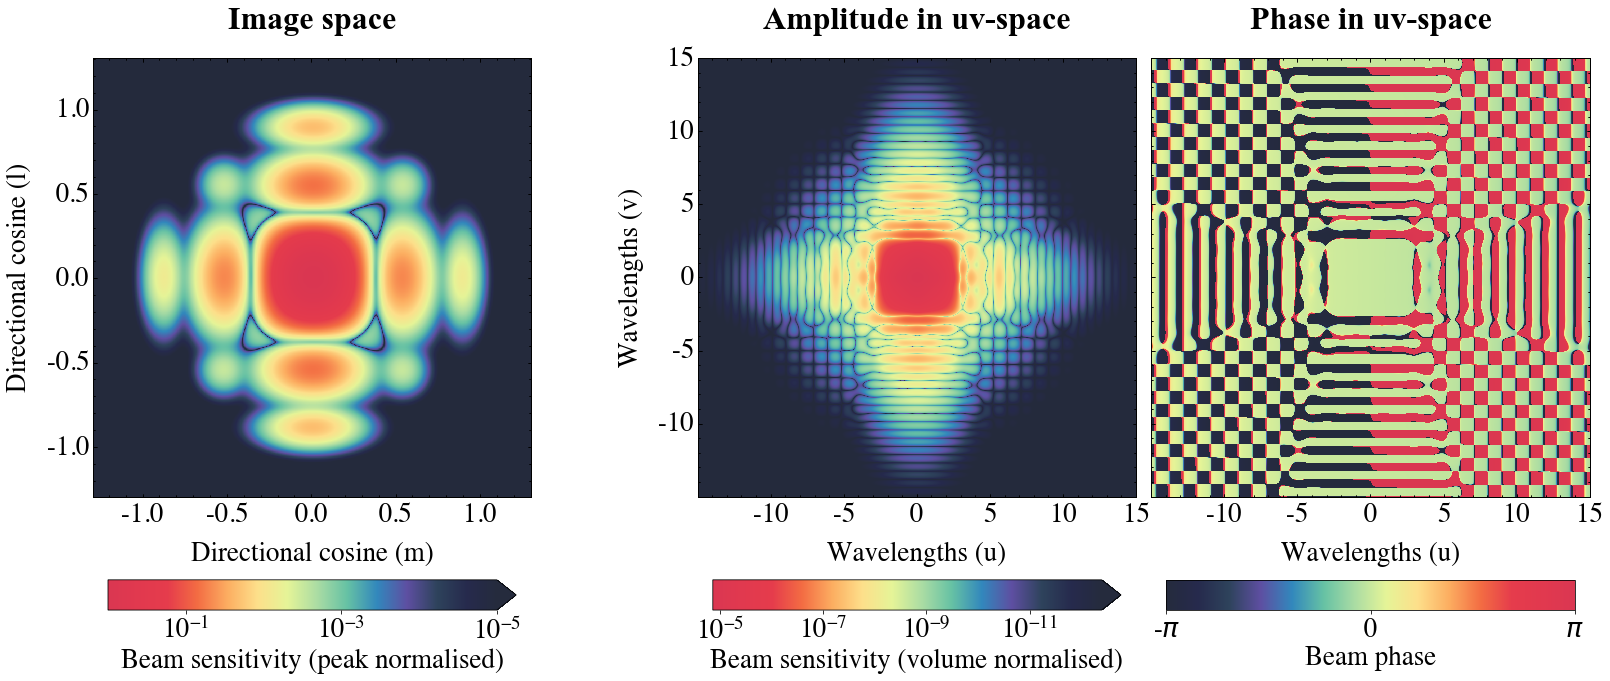

In [12]:
#TOP ONLY


fitslist = [dir_fits+'beam_abs_'+key+'_'+d_type[0]+'_'+mask_type[0]+'.header.fits',
            dir_fits+'beam_abs_'+key+'_'+d_type[1]+'_'+mask_type[1]+'.header.fits',
            dir_fits+'beam_abs_'+key+'_'+d_type[2]+'_'+mask_type[2]+'.header.fits',
            dir_fits+'beam_phase_'+key+'_'+d_type[0]+'_'+mask_type[0]+'.header.fits',
            dir_fits+'beam_phase_'+key+'_'+d_type[1]+'_'+mask_type[1]+'.header.fits',
            dir_fits+'beam_phase_'+key+'_'+d_type[2]+'_'+mask_type[2]+'.header.fits']
fitslist_image = [dir_fits+'beam_image_'+key+'_'+d_type[0]+'.header.fits',
            dir_fits+'beam_image_'+key+'_'+d_type[1]+'.header.fits',
            dir_fits+'beam_image_'+key+'_'+d_type[2]+'.header.fits']
kernel_names = ['Gaussian decomposition','Gaussian decomposition with half-power sidelobes',
                'Single matched-FWHM Gaussian']
plot_save_name = 'panel_top_highres_font.pdf'

cmap_image=cb_spec#'Spectral_r'#'gnuplot2'#
cmap_uv_amp=cb_spec
cmap_uv_phase=cb_spec
vmax_image=1
vmin_image=1e-5
vmax_uv_amp=1.4e-5 #.035
vmin_uv_amp=4e-13#1e-9
vmax_uv_phase=np.pi
vmin_uv_phase=-np.pi

#[xmin, ymin, dx, dy]

xmin1=0.1
xmin2=.5
xmin3=.8

subplot_loc_11 = [xmin1,.7,0.29,.29]
subplot_loc_12 = [xmin2,.7,0.29,.29]
subplot_loc_13 = [xmin3,0.7,0.29,.29]

subplot_loc_21 = [xmin1,.4,0.29,.29]
subplot_loc_22 = [xmin2,.4,0.29,.29]
subplot_loc_23 = [xmin3,.4,0.29,.29]

subplot_loc_31 = [xmin1,.1,0.29,.29]
subplot_loc_32 = [xmin2,.1,0.29,.29]
subplot_loc_33 = [xmin3,.1,0.29,.29]

font_size_axis = 27#22 (default font)
font_size_title = 32#25 (default font)
title_pad = 30 #in points

# Plot a 3x3 Figure

#Top left - Image control
fig = pl.figure(figsize=(21,21))
f1 = aplpy.FITSFigure(fitslist_image[0], figure=fig, subplot=subplot_loc_31)
f1.show_colorscale(cmap=cmap_image, stretch='log',vmin=vmin_image,vmax=vmax_image)
f1.axis_labels.set_ytext('Directional cosine (l)')
f1.axis_labels.set_xtext('Directional cosine (m)')
f1.axis_labels.set_font(family=font_name,size=font_size_axis)
f1.tick_labels.set_font(family=font_name,size=font_size_axis)
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')
f1.set_title('Image space',size=font_size_title,pad=title_pad,fontproperties=font_bold)

#Top middle - uv amp control
f2 = aplpy.FITSFigure(fitslist[0], figure=fig, subplot=subplot_loc_32)
f2.show_colorscale(cmap=cmap_uv_amp, stretch='log',vmin=vmin_uv_amp,vmax=vmax_uv_amp)
f2.axis_labels.set_ytext('Wavelengths (v)')
f2.axis_labels.set_xtext('Wavelengths (u)')
f2.axis_labels.set_font(family=font_name,size=font_size_axis)
f2.tick_labels.set_font(family=font_name,size=font_size_axis)
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')
f2.set_title('Amplitude in uv-space',size=font_size_title,pad=title_pad,fontproperties=font_bold)

#Top right - uv phase control
f3 = aplpy.FITSFigure(fitslist[3], figure=fig, subplot=subplot_loc_33)
f3.show_colorscale(cmap=cmap_uv_phase, stretch='linear',vmin=vmin_uv_phase,vmax=vmax_uv_phase)
f3.axis_labels.set_ytext('Wavelengths (v)')
f3.axis_labels.set_xtext('Wavelengths (u)')
f3.axis_labels.set_font(family=font_name,size=font_size_axis)
f3.tick_labels.set_font(family=font_name,size=font_size_axis)
f3.axis_labels.hide_y()
f3.tick_labels.hide_y()
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')
f3.set_title('Phase in uv-space',size=font_size_title,pad=title_pad,fontproperties=font_bold)

#Image space bar
#[left, bottom, width, height]
cbar_ax1 = fig.add_axes([xmin1+.01, 0.025, 0.27, 0.02])
cbar1 = pl.colorbar(pcm_image, cax=cbar_ax1,extend='min',orientation="horizontal")
cbar_ax1.invert_xaxis()
cbar1.set_label(label='Beam sensitivity (peak normalised)',size=font_size_axis,fontproperties=font)
for tick in cbar_ax1.xaxis.majorTicks:
    tick.label1.set_fontproperties(font)
cbar_ax1.tick_params(labelsize=font_size_axis)

#UV amp space bar
#[left, bottom, width, height]
cbar_ax2 = fig.add_axes([xmin2+.01, 0.025, 0.27, 0.02])
cbar2 = pl.colorbar(pcm_uv_amp, cax=cbar_ax2,extend='min',orientation="horizontal")
cbar_ax2.invert_xaxis()
cbar2.set_label(label='Beam sensitivity (volume normalised)',size=font_size_axis,fontproperties=font)
for tick in cbar_ax2.xaxis.majorTicks:
    tick.label1.set_fontproperties(font)
cbar_ax2.tick_params(labelsize=font_size_axis)

#UV phase space bar
#[left, bottom, width, height]
cbar_ax3 = fig.add_axes([xmin3+.01, 0.025, 0.27, 0.02])
cbar3 = pl.colorbar(pcm_uv_phase, cax=cbar_ax3,orientation="horizontal",ticks=[-np.pi, 0, np.pi])
cbar3.set_label(label='Beam phase',size=font_size_axis,fontproperties=font,labelpad=3)
cbar_ax3.set_xticklabels([r'-$\pi$', '0', r'$\pi$'])
for tick in cbar_ax3.xaxis.majorTicks:
    tick.label1.set_fontproperties(font)
cbar_ax3.tick_params(labelsize=font_size_axis)


pl.savefig(dir_fits+plot_save_name, bbox_inches='tight', dpi=128)

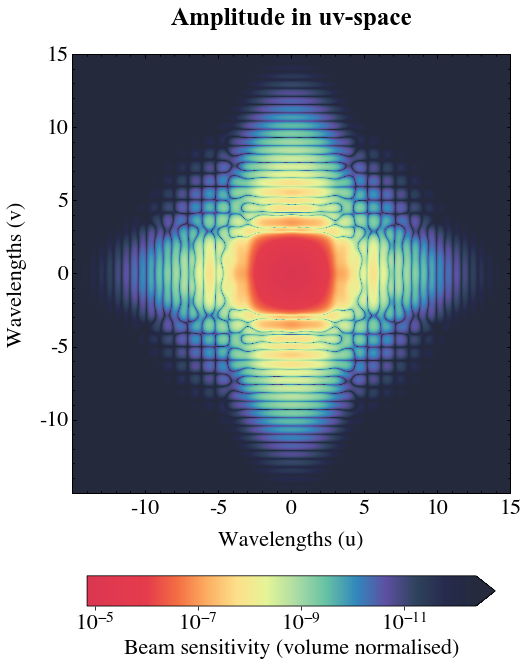

In [13]:
#Middle ONLY


fitslist = [dir_fits+'beam_abs_'+key+'_'+d_type[0]+'_'+mask_type[0]+'.header.fits',
            dir_fits+'beam_abs_'+key+'_'+d_type[1]+'_'+mask_type[1]+'.header.fits',
            dir_fits+'beam_abs_'+key+'_'+d_type[2]+'_'+mask_type[2]+'.header.fits',
            dir_fits+'beam_phase_'+key+'_'+d_type[0]+'_'+mask_type[0]+'.header.fits',
            dir_fits+'beam_phase_'+key+'_'+d_type[1]+'_'+mask_type[1]+'.header.fits',
            dir_fits+'beam_phase_'+key+'_'+d_type[2]+'_'+mask_type[2]+'.header.fits']
fitslist_image = [dir_fits+'beam_image_'+key+'_'+d_type[0]+'.header.fits',
            dir_fits+'beam_image_'+key+'_'+d_type[1]+'.header.fits',
            dir_fits+'beam_image_'+key+'_'+d_type[2]+'.header.fits']
kernel_names = ['Gaussian decomposition','Gaussian decomposition with half-power sidelobes',
                'Single matched-FWHM Gaussian']
plot_save_name = 'panel_middle_highres_amp_font.pdf'

cmap_image=cb_spec#'Spectral_r'#'gnuplot2'#
cmap_uv_amp=cb_spec
cmap_uv_phase=cb_spec
vmax_image=1
vmin_image=1e-5
vmax_uv_amp=1.4e-5 #.035
vmin_uv_amp=4e-13#1e-9
vmax_uv_phase=np.pi
vmin_uv_phase=-np.pi

#[xmin, ymin, dx, dy]

xmin1=0.1
xmin2=.5
xmin3=.8

subplot_loc_11 = [xmin1,.7,0.29,.29]
subplot_loc_12 = [xmin2,.7,0.29,.29]
subplot_loc_13 = [xmin3,0.7,0.29,.29]

subplot_loc_21 = [xmin1,.4,0.29,.29]
subplot_loc_22 = [xmin2,.4,0.29,.29]
subplot_loc_23 = [xmin3,.4,0.29,.29]

subplot_loc_31 = [xmin1,.1,0.29,.29]
subplot_loc_32 = [xmin2,.1,0.29,.29]
subplot_loc_33 = [xmin3,.1,0.29,.29]

font_size_axis = 22
font_size_title = 25
title_pad = 30 #in points

# Plot a 3x3 Figure

#Top left - Image control
fig = pl.figure(figsize=(21,21))
#f1 = aplpy.FITSFigure(fitslist_image[1], figure=fig, subplot=subplot_loc_31)
#f1.show_colorscale(cmap=cmap_image, stretch='log',vmin=vmin_image,vmax=vmax_image)
#f1.axis_labels.set_ytext('Directional cosine (l)')
#f1.axis_labels.set_xtext('Directional cosine (m)')
#f1.axis_labels.set_font(family=font_name,size=font_size_axis)
#f1.tick_labels.set_font(family=font_name,size=font_size_axis)
#a=pl.gca()
#a.tick_params(direction='in', color='k', which='both')
#f1.set_title('Image space',size=font_size_title,pad=title_pad,fontproperties=font_bold)

#Top middle - uv amp control
f2 = aplpy.FITSFigure(fitslist[1], figure=fig, subplot=subplot_loc_32)
f2.show_colorscale(cmap=cmap_uv_amp, stretch='log',vmin=vmin_uv_amp,vmax=vmax_uv_amp)
f2.axis_labels.set_ytext('Wavelengths (v)')
f2.axis_labels.set_xtext('Wavelengths (u)')
f2.axis_labels.set_font(family=font_name,size=font_size_axis)
f2.tick_labels.set_font(family=font_name,size=font_size_axis)
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')
f2.set_title('Amplitude in uv-space',size=font_size_title,pad=title_pad,fontproperties=font_bold)

#Top right - uv phase control
#f3 = aplpy.FITSFigure(fitslist[4], figure=fig, subplot=subplot_loc_33)
#f3.show_colorscale(cmap=cmap_uv_phase, stretch='linear',vmin=vmin_uv_phase,vmax=vmax_uv_phase)
#f3.axis_labels.set_ytext('Wavelengths (v)')
#f3.axis_labels.set_xtext('Wavelengths (u)')
#f3.axis_labels.set_font(family=font_name,size=font_size_axis)
#f3.tick_labels.set_font(family=font_name,size=font_size_axis)
#f3.axis_labels.hide_y()
#f3.tick_labels.hide_y()
#a=pl.gca()
#a.tick_params(direction='in', color='k', which='both')
#f3.set_title('Phase in uv-space',size=font_size_title,pad=title_pad,fontproperties=font_bold)

#Image space bar
#[left, bottom, width, height]
#cbar_ax1 = fig.add_axes([xmin1+.01, 0.025, 0.27, 0.02])
#cbar1 = pl.colorbar(pcm_image, cax=cbar_ax1,extend='min',orientation="horizontal")
#cbar_ax1.invert_xaxis()
#cbar1.set_label(label='Beam sensitivity (peak normalised)',size=font_size_axis,fontproperties=font)
#for tick in cbar_ax1.xaxis.majorTicks:
#    tick.label1.set_fontproperties(font)
#cbar_ax1.tick_params(labelsize=font_size_axis)

#UV amp space bar
#[left, bottom, width, height]
cbar_ax2 = fig.add_axes([xmin2+.01, 0.025, 0.27, 0.02])
cbar2 = pl.colorbar(pcm_uv_amp, cax=cbar_ax2,extend='min',orientation="horizontal")
cbar_ax2.invert_xaxis()
cbar2.set_label(label='Beam sensitivity (volume normalised)',size=font_size_axis,fontproperties=font)
for tick in cbar_ax2.xaxis.majorTicks:
    tick.label1.set_fontproperties(font)
cbar_ax2.tick_params(labelsize=font_size_axis)

#UV phase space bar
#[left, bottom, width, height]
#cbar_ax3 = fig.add_axes([xmin3+.01, 0.025, 0.27, 0.02])
#cbar3 = pl.colorbar(pcm_uv_phase, cax=cbar_ax3,orientation="horizontal",ticks=[-np.pi, 0, np.pi])
#cbar3.set_label(label='Beam phase',size=font_size_axis,fontproperties=font,labelpad=3)
#cbar_ax3.set_xticklabels([r'-$\pi$', '0', r'$\pi$'])
#for tick in cbar_ax3.xaxis.majorTicks:
#    tick.label1.set_fontproperties(font)
#cbar_ax3.tick_params(labelsize=font_size_axis)


pl.savefig(dir_fits+plot_save_name, bbox_inches='tight', dpi=128)

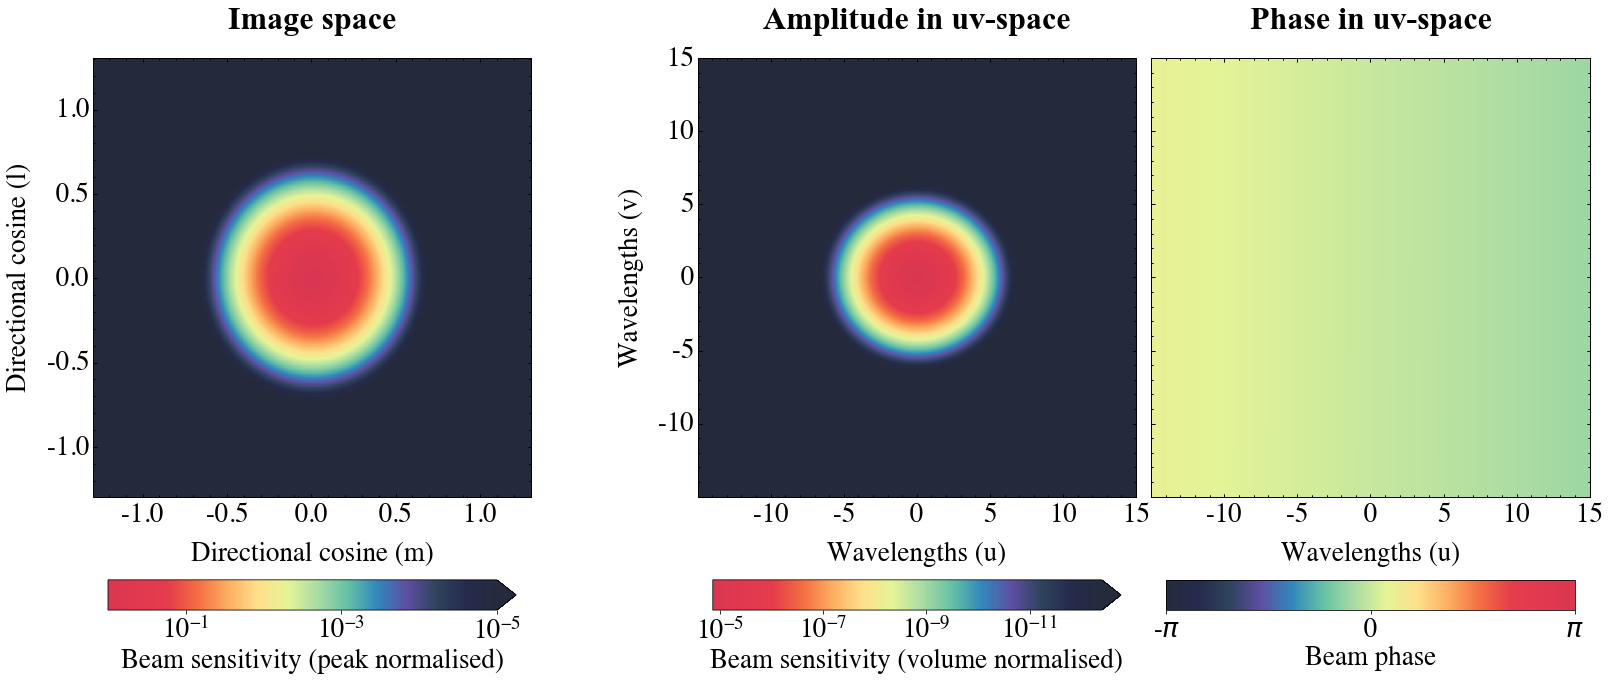

In [14]:
#Bottom ONLY


fitslist = [dir_fits+'beam_abs_large_'+d_type[0]+'_'+mask_type[0]+'.header.fits',
            dir_fits+'beam_abs_large_'+d_type[1]+'_'+mask_type[1]+'.header.fits',
            dir_fits+'beam_abs_large_'+d_type[2]+'_'+mask_type[2]+'.header.fits',
            dir_fits+'beam_phase_large_'+d_type[0]+'_'+mask_type[0]+'.header.fits',
            dir_fits+'beam_phase_large_'+d_type[1]+'_'+mask_type[1]+'.header.fits',
            dir_fits+'beam_phase_large_'+d_type[2]+'_'+mask_type[2]+'.header.fits']
fitslist_image = [dir_fits+'beam_image_large_'+d_type[0]+'.header.fits',
            dir_fits+'beam_image_large_'+d_type[1]+'.header.fits',
            dir_fits+'beam_image_large_'+d_type[2]+'.header.fits']
kernel_names = ['Gaussian decomposition','Gaussian decomposition with half-power sidelobes',
                'Single matched-FWHM Gaussian']
plot_save_name = 'panel_bottom_highres_font.pdf'

cmap_image=cb_spec#'Spectral_r'#'gnuplot2'#
cmap_uv_amp=cb_spec
cmap_uv_phase=cb_spec
vmax_image=1
vmin_image=1e-5
vmax_uv_amp=1.4e-5 #.035
vmin_uv_amp=4e-13#1e-9
vmax_uv_phase=np.pi
vmin_uv_phase=-np.pi

#[xmin, ymin, dx, dy]

xmin1=0.1
xmin2=.5
xmin3=.8

subplot_loc_11 = [xmin1,.7,0.29,.29]
subplot_loc_12 = [xmin2,.7,0.29,.29]
subplot_loc_13 = [xmin3,0.7,0.29,.29]

subplot_loc_21 = [xmin1,.4,0.29,.29]
subplot_loc_22 = [xmin2,.4,0.29,.29]
subplot_loc_23 = [xmin3,.4,0.29,.29]

subplot_loc_31 = [xmin1,.1,0.29,.29]
subplot_loc_32 = [xmin2,.1,0.29,.29]
subplot_loc_33 = [xmin3,.1,0.29,.29]

font_size_axis = 27#22 (default font)
font_size_title = 32#25 (default font)
title_pad = 30 #in points

# Plot a 3x3 Figure

#Top left - Image control
fig = pl.figure(figsize=(21,21))
f1 = aplpy.FITSFigure(fitslist_image[2], figure=fig, subplot=subplot_loc_31)
f1.show_colorscale(cmap=cmap_image, stretch='log',vmin=vmin_image,vmax=vmax_image)
f1.axis_labels.set_ytext('Directional cosine (l)')
f1.axis_labels.set_xtext('Directional cosine (m)')
f1.axis_labels.set_font(family=font_name,size=font_size_axis)
f1.tick_labels.set_font(family=font_name,size=font_size_axis)
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')
f1.set_title('Image space',size=font_size_title,pad=title_pad,fontproperties=font_bold)

#Top middle - uv amp control
f2 = aplpy.FITSFigure(fitslist[2], figure=fig, subplot=subplot_loc_32)
f2.show_colorscale(cmap=cmap_uv_amp, stretch='log',vmin=vmin_uv_amp,vmax=vmax_uv_amp)
f2.axis_labels.set_ytext('Wavelengths (v)')
f2.axis_labels.set_xtext('Wavelengths (u)')
f2.axis_labels.set_font(family=font_name,size=font_size_axis)
f2.tick_labels.set_font(family=font_name,size=font_size_axis)
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')
f2.set_title('Amplitude in uv-space',size=font_size_title,pad=title_pad,fontproperties=font_bold)

#Top right - uv phase control
f3 = aplpy.FITSFigure(fitslist[5], figure=fig, subplot=subplot_loc_33)
f3.show_colorscale(cmap=cmap_uv_phase, stretch='linear',vmin=vmin_uv_phase,vmax=vmax_uv_phase)
f3.axis_labels.set_ytext('Wavelengths (v)')
f3.axis_labels.set_xtext('Wavelengths (u)')
f3.axis_labels.set_font(family=font_name,size=font_size_axis)
f3.tick_labels.set_font(family=font_name,size=font_size_axis)
f3.axis_labels.hide_y()
f3.tick_labels.hide_y()
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')
f3.set_title('Phase in uv-space',size=font_size_title,pad=title_pad,fontproperties=font_bold)

#Image space bar
#[left, bottom, width, height]
cbar_ax1 = fig.add_axes([xmin1+.01, 0.025, 0.27, 0.02])
cbar1 = pl.colorbar(pcm_image, cax=cbar_ax1,extend='min',orientation="horizontal")
cbar_ax1.invert_xaxis()
cbar1.set_label(label='Beam sensitivity (peak normalised)',size=font_size_axis,fontproperties=font)
for tick in cbar_ax1.xaxis.majorTicks:
    tick.label1.set_fontproperties(font)
cbar_ax1.tick_params(labelsize=font_size_axis)

#UV amp space bar
#[left, bottom, width, height]
cbar_ax2 = fig.add_axes([xmin2+.01, 0.025, 0.27, 0.02])
cbar2 = pl.colorbar(pcm_uv_amp, cax=cbar_ax2,extend='min',orientation="horizontal")
cbar_ax2.invert_xaxis()
cbar2.set_label(label='Beam sensitivity (volume normalised)',size=font_size_axis,fontproperties=font)
for tick in cbar_ax2.xaxis.majorTicks:
    tick.label1.set_fontproperties(font)
cbar_ax2.tick_params(labelsize=font_size_axis)

#UV phase space bar
#[left, bottom, width, height]
cbar_ax3 = fig.add_axes([xmin3+.01, 0.025, 0.27, 0.02])
cbar3 = pl.colorbar(pcm_uv_phase, cax=cbar_ax3,orientation="horizontal",ticks=[-np.pi, 0, np.pi])
cbar3.set_label(label='Beam phase',size=font_size_axis,fontproperties=font,labelpad=3)
cbar_ax3.set_xticklabels([r'-$\pi$', '0', r'$\pi$'])
for tick in cbar_ax3.xaxis.majorTicks:
    tick.label1.set_fontproperties(font)
cbar_ax3.tick_params(labelsize=font_size_axis)



pl.savefig(dir_fits+plot_save_name, bbox_inches='tight', dpi=128)

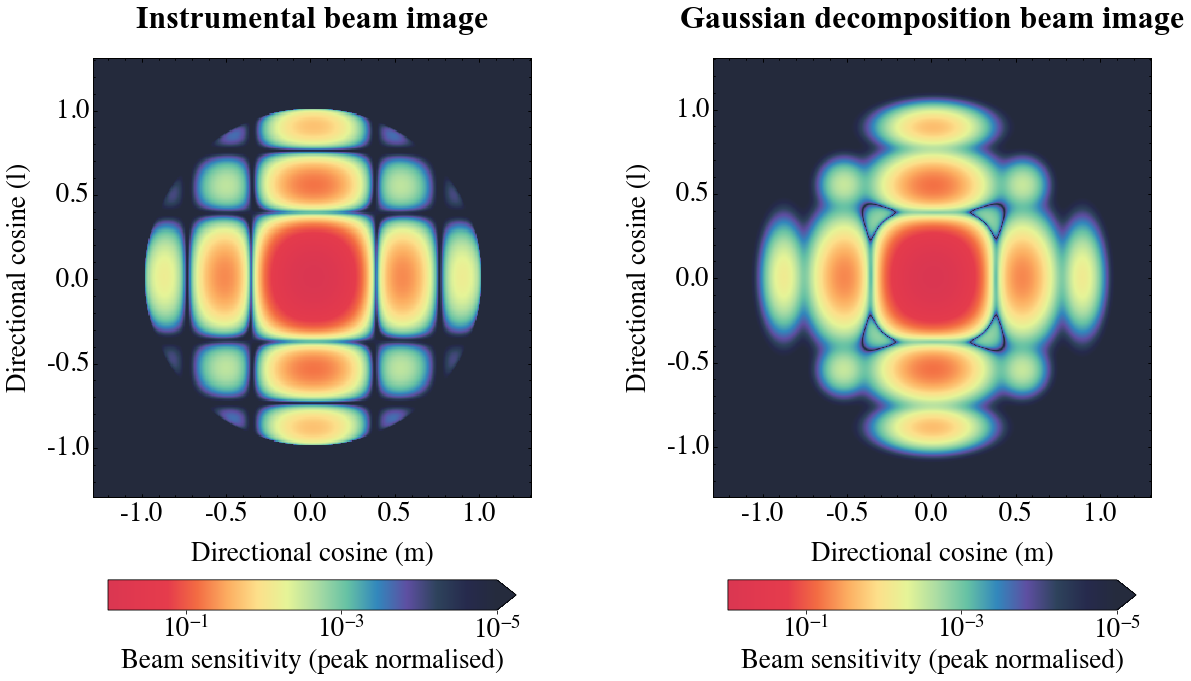

In [14]:
#Image ONLY

fitslist_image = [dir_fits+'beam_image_large_'+d_type[0]+'.header.fits',
                  dir_fits+'beam_image_large_'+d_type[1]+'.header.fits',
                  dir_fits+'beam_image_large_'+d_type[2]+'.header.fits',
                  dir_fits+'low_res/beam_image_inst.header.fits']
kernel_names = ['Gaussian decomposition','Gaussian decomposition with half-power sidelobes',
                'Single matched-FWHM Gaussian']
plot_save_name = 'instrument_compare_font.pdf'

cmap_image=cb_spec#'Spectral_r'#'gnuplot2'#
cmap_uv_amp=cb_spec
cmap_uv_phase=cb_spec
vmax_image=1
vmin_image=1e-5
vmax_uv_amp=.035
vmin_uv_amp=1e-9
vmax_uv_phase=np.pi
vmin_uv_phase=-np.pi

#[xmin, ymin, dx, dy]

xmin1=0.1
xmin2=.51

subplot_loc_1 = [xmin1,.1,0.29,.29]
subplot_loc_2 = [xmin2,.1,0.29,.29]
subplot_loc_33 = [xmin3,.1,0.29,.29]

font_size_axis = 27#22 (default font)
font_size_title = 32#25 (default font)
title_pad = 30 #in points

# Plot a 1x2 Figure

#Top left - Image control
fig = pl.figure(figsize=(21,21))
f1 = aplpy.FITSFigure(fitslist_image[3], figure=fig, subplot=subplot_loc_1)
f1.show_colorscale(cmap=cmap_image, stretch='log',vmin=vmin_image,vmax=vmax_image)
f1.axis_labels.set_ytext('Directional cosine (l)')
f1.axis_labels.set_xtext('Directional cosine (m)')
f1.axis_labels.set_font(family=font_name,size=font_size_axis)
f1.tick_labels.set_font(family=font_name,size=font_size_axis)
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')
f1.set_title('Instrumental beam image',size=font_size_title,pad=title_pad,fontproperties=font_bold)

#Top middle - uv amp control
f2 = aplpy.FITSFigure(fitslist_image[0], figure=fig, subplot=subplot_loc_2)
f2.show_colorscale(cmap=cmap_image, stretch='log',vmin=vmin_image,vmax=vmax_image)
f2.axis_labels.set_ytext('Directional cosine (l)')
f2.axis_labels.set_xtext('Directional cosine (m)')
f2.axis_labels.set_font(family=font_name,size=font_size_axis)
f2.tick_labels.set_font(family=font_name,size=font_size_axis)
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')
f2.set_title('Gaussian decomposition beam image',size=font_size_title,pad=title_pad,fontproperties=font_bold)

#Image space bar
#[left, bottom, width, height]
cbar_ax1 = fig.add_axes([xmin1+.01, 0.025, 0.27, 0.02])
cbar1 = pl.colorbar(pcm_image, cax=cbar_ax1,extend='min',orientation="horizontal")
cbar1.set_label(label='Beam sensitivity (peak normalised)',size=font_size_axis,fontproperties=font)
for tick in cbar_ax1.xaxis.majorTicks:
    tick.label1.set_fontproperties(font)
cbar_ax1.tick_params(labelsize=font_size_axis)

#Image space bar
#[left, bottom, width, height]
cbar_ax2 = fig.add_axes([xmin2+.01, 0.025, 0.27, 0.02])
cbar2 = pl.colorbar(pcm_image, cax=cbar_ax2,extend='min',orientation="horizontal")
cbar2.set_label(label='Beam sensitivity (peak normalised)',size=font_size_axis,fontproperties=font)
for tick in cbar_ax2.xaxis.majorTicks:
    tick.label1.set_fontproperties(font)
cbar_ax2.tick_params(labelsize=font_size_axis)

cbar_ax1.invert_xaxis()
cbar_ax2.invert_xaxis()

pl.savefig(dir_fits+plot_save_name, bbox_inches='tight', dpi=128)

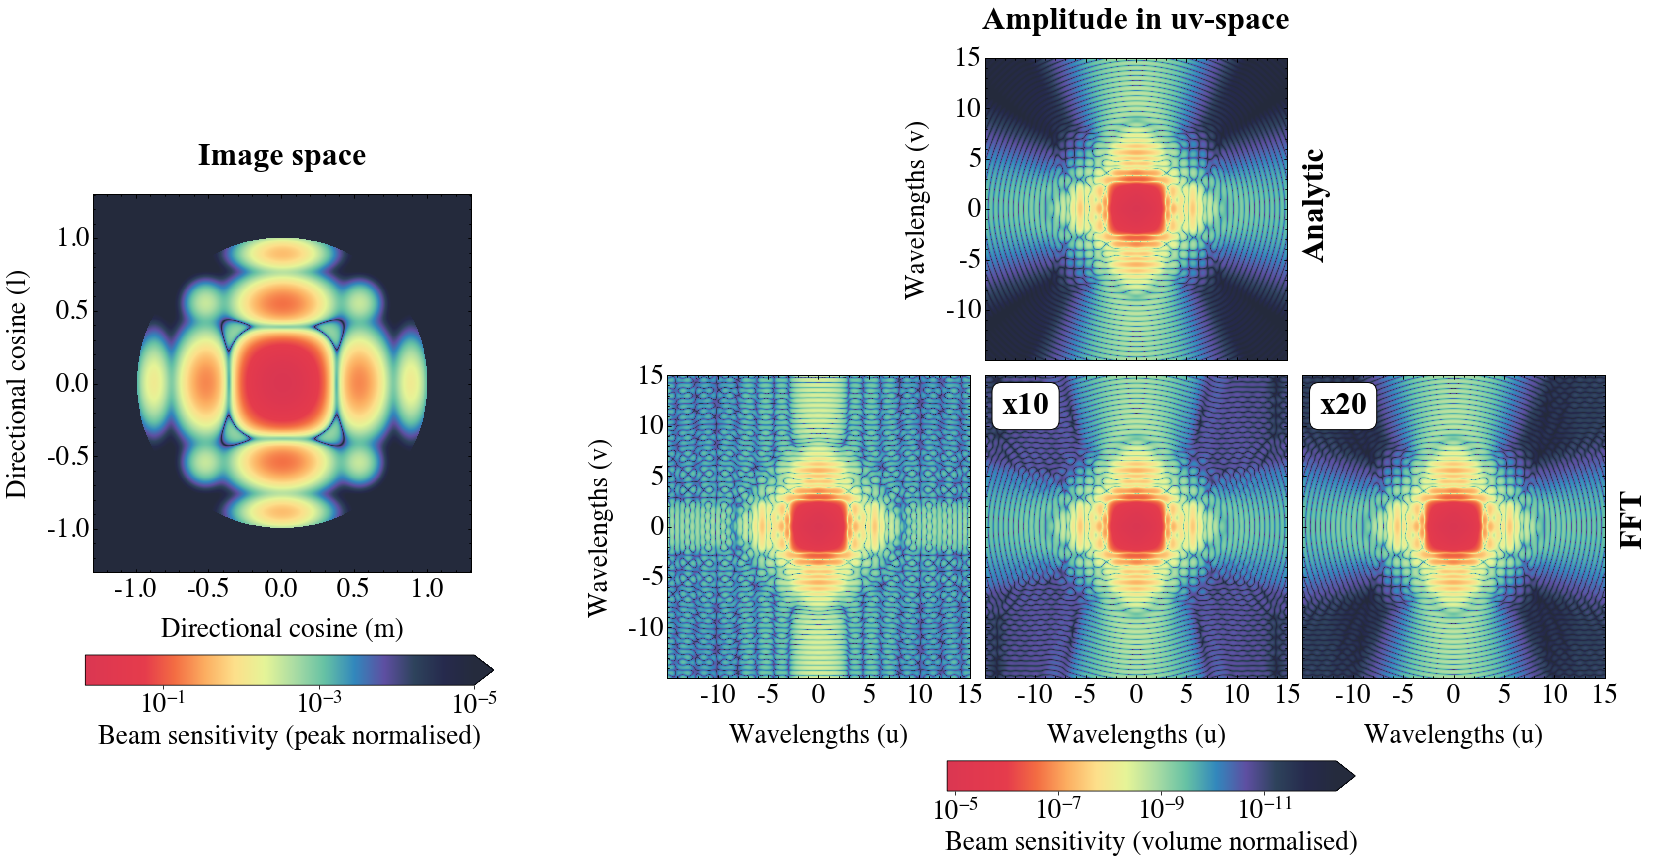

In [5]:
#FFT comparison ONLY
fft_type = '1010'
an_type = '1000'

fitslist = [dir_fits+'beam_abs_large_horizon_'+an_type+'_60.header.fits',
            dir_fits+'beam_phase_large_horizon_'+an_type+'_60.header.fits',
            dir_fits+'beam_abs_large_horizon_'+fft_type+'_60.header.fits',
            dir_fits+'beam_phase_large_horizon_'+fft_type+'_60.header.fits',
            dir_fits+'beam_abs_large_horizon_'+fft_type+'_600.header.fits',
            dir_fits+'beam_phase_large_horizon_'+fft_type+'_600.header.fits',
            dir_fits+'beam_abs_large_horizon_'+fft_type+'_1200.header.fits',
            dir_fits+'beam_phase_large_horizon_'+fft_type+'_1200.header.fits']
fitslist_image = [dir_fits+'beam_image_large_horizon_'+an_type+'.header.fits']

plot_save_name = 'horizon_fft_font_v2.pdf'

cmap_image=cb_spec#'Spectral_r'#'gnuplot2'#
cmap_uv_amp=cb_spec
cmap_uv_phase=cb_spec
vmax_image=1
vmin_image=1e-5
vmax_uv_amp=1.4e-5 #.035
vmin_uv_amp=4e-13#1e-9
vmax_uv_phase=np.pi
vmin_uv_phase=-np.pi

#[xmin, ymin, dx, dy]

xmin1=0.1
xmin2=.5
xmin3=.8

subplot_loc_11 = [xmin1,.57,0.25,.25]
subplot_loc_21 = [.69,.71,.2,.2]
subplot_loc_31 = [.48,.5,.2,.2]
subplot_loc_32 = [.69,.5,.2,.2]
subplot_loc_33 = [.9,.5,.2,.2]
#subplot_loc_12 = [xmin2,.7,0.29,.29]
#subplot_loc_13 = [xmin3,0.7,0.29,.29]

#subplot_loc_21 = [xmin1,.4,0.29,.29]
#subplot_loc_22 = [xmin2,.4,0.29,.29]
#subplot_loc_23 = [xmin3,.4,0.29,.29]

#subplot_loc_31 = [xmin1,.1,0.29,.29]
#subplot_loc_32 = [xmin2,.1,0.29,.29]
#subplot_loc_33 = [xmin3,.1,0.29,.29]

font_size_axis = 27#22 (default font)
font_size_title = 32#25 (default font)
title_pad = 30 #in points


#Left - Image
fig = pl.figure(figsize=(21,21))
f1 = aplpy.FITSFigure(fitslist_image[0], figure=fig, subplot=subplot_loc_11)
#f1 = aplpy.FITSFigure(fitslist_image[0], figure=fig, subplot=[.1,.1,0.29,.29])
f1.show_colorscale(cmap=cmap_image, stretch='log',vmin=vmin_image,vmax=vmax_image)
f1.axis_labels.set_ytext('Directional cosine (l)')
f1.axis_labels.set_xtext('Directional cosine (m)')
f1.axis_labels.set_font(family=font_name,size=font_size_axis)
f1.tick_labels.set_font(family=font_name,size=font_size_axis)
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')
f1.set_title('Image space',size=font_size_title,pad=title_pad,fontproperties=font_bold)

#Top middle - uv amp analytic
f2 = aplpy.FITSFigure(fitslist[0], figure=fig, subplot=subplot_loc_21)
#f2 = aplpy.FITSFigure(fitslist[0], figure=fig, subplot=[.51,.1,0.29,.29])
f2.show_colorscale(cmap=cmap_uv_amp, stretch='log',vmin=vmin_uv_amp,vmax=vmax_uv_amp)
f2.axis_labels.set_ytext('Wavelengths (v)')
f2.axis_labels.set_xtext('Wavelengths (u)')
f2.axis_labels.set_font(family=font_name,size=font_size_axis)
f2.tick_labels.set_font(family=font_name,size=font_size_axis)
f2.axis_labels.hide_x()
f2.tick_labels.hide_x()
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')
f2.set_title('Amplitude in uv-space',size=font_size_title,pad=title_pad,fontproperties=font_bold)

#Bottom left - uv amp fft native
f3 = aplpy.FITSFigure(fitslist[2], figure=fig, subplot=subplot_loc_31)
f3.show_colorscale(cmap=cmap_uv_amp, stretch='log',vmin=vmin_uv_amp,vmax=vmax_uv_amp)
f3.axis_labels.set_ytext('Wavelengths (v)')
f3.axis_labels.set_xtext('Wavelengths (u)')
f3.axis_labels.set_font(family=font_name,size=font_size_axis)
f3.tick_labels.set_font(family=font_name,size=font_size_axis)
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')

#Bottom left - uv amp fft x10
f4 = aplpy.FITSFigure(fitslist[4], figure=fig, subplot=subplot_loc_32)
f4.show_colorscale(cmap=cmap_uv_amp, stretch='log',vmin=vmin_uv_amp,vmax=vmax_uv_amp)
f4.axis_labels.set_ytext('Wavelengths (v)')
f4.axis_labels.set_xtext('Wavelengths (u)')
f4.axis_labels.set_font(family=font_name,size=font_size_axis)
f4.tick_labels.set_font(family=font_name,size=font_size_axis)
f4.axis_labels.hide_y()
f4.tick_labels.hide_y()
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')

#Bottom left - uv amp fft x20
f5 = aplpy.FITSFigure(fitslist[6], figure=fig, subplot=subplot_loc_33)
f5.show_colorscale(cmap=cmap_uv_amp, stretch='log',vmin=vmin_uv_amp,vmax=vmax_uv_amp)
f5.axis_labels.set_ytext('Wavelengths (v)')
f5.axis_labels.set_xtext('Wavelengths (u)')
f5.axis_labels.set_font(family=font_name,size=font_size_axis)
f5.tick_labels.set_font(family=font_name,size=font_size_axis)
f5.axis_labels.hide_y()
f5.tick_labels.hide_y()
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')

#Image space bar
#[left, bottom, width, height]
cbar_ax1 = fig.add_axes([xmin1-.005, 0.57-0.075, 0.27, 0.02])
#cbar_ax1 = fig.add_axes([xmin1+.01, 0.025, 0.27, 0.02])
cbar1 = pl.colorbar(pcm_image, cax=cbar_ax1,extend='min',orientation="horizontal")
cbar_ax1.invert_xaxis()
cbar1.set_label(label='Beam sensitivity (peak normalised)',size=font_size_axis,fontproperties=font)
for tick in cbar_ax1.xaxis.majorTicks:
    tick.label1.set_fontproperties(font)
cbar_ax1.tick_params(labelsize=font_size_axis)

#UV amp space bar
#[left, bottom, width, height]
cbar_ax2 = fig.add_axes([.665, 0.425, 0.27, 0.02])
#cbar_ax2 = fig.add_axes([xmin2+.01, 0.025, 0.27, 0.02])
cbar2 = pl.colorbar(pcm_uv_amp, cax=cbar_ax2,extend='min',orientation="horizontal")
cbar_ax2.invert_xaxis()
cbar2.set_label(label='Beam sensitivity (volume normalised)',size=font_size_axis,fontproperties=font)
for tick in cbar_ax2.xaxis.majorTicks:
    tick.label1.set_fontproperties(font)
cbar_ax2.tick_params(labelsize=font_size_axis)

fig.text(.9, .78, 'Analytic',rotation='vertical',fontsize=font_size_title,fontproperties=font_bold)
fig.text(1.11, .59, 'FFT',rotation='vertical',fontsize=font_size_title,fontproperties=font_bold)

fig.text(.701, .675, 'x10',fontsize=font_size_title,fontproperties=font_bold,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))
fig.text(.911, .675, 'x20',fontsize=font_size_title,fontproperties=font_bold,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))

pl.savefig(dir_fits+plot_save_name, bbox_inches='tight', dpi=128)

In [39]:
fh = fits.getheader(fitslist_image[0])
fd = fits.getdata(fitslist_image[0])
ind_test = 391
min_ind = min((np.where(fd[ind_test,:] != 0)[0])) #0.00075 #0.0027
max_ind = max((np.where(fd[ind_test,:] != 0)[0]))
print(fd[ind_test,min_ind],fd[ind_test,max_ind])

0.0007487136191340842 0.0007905849790030566


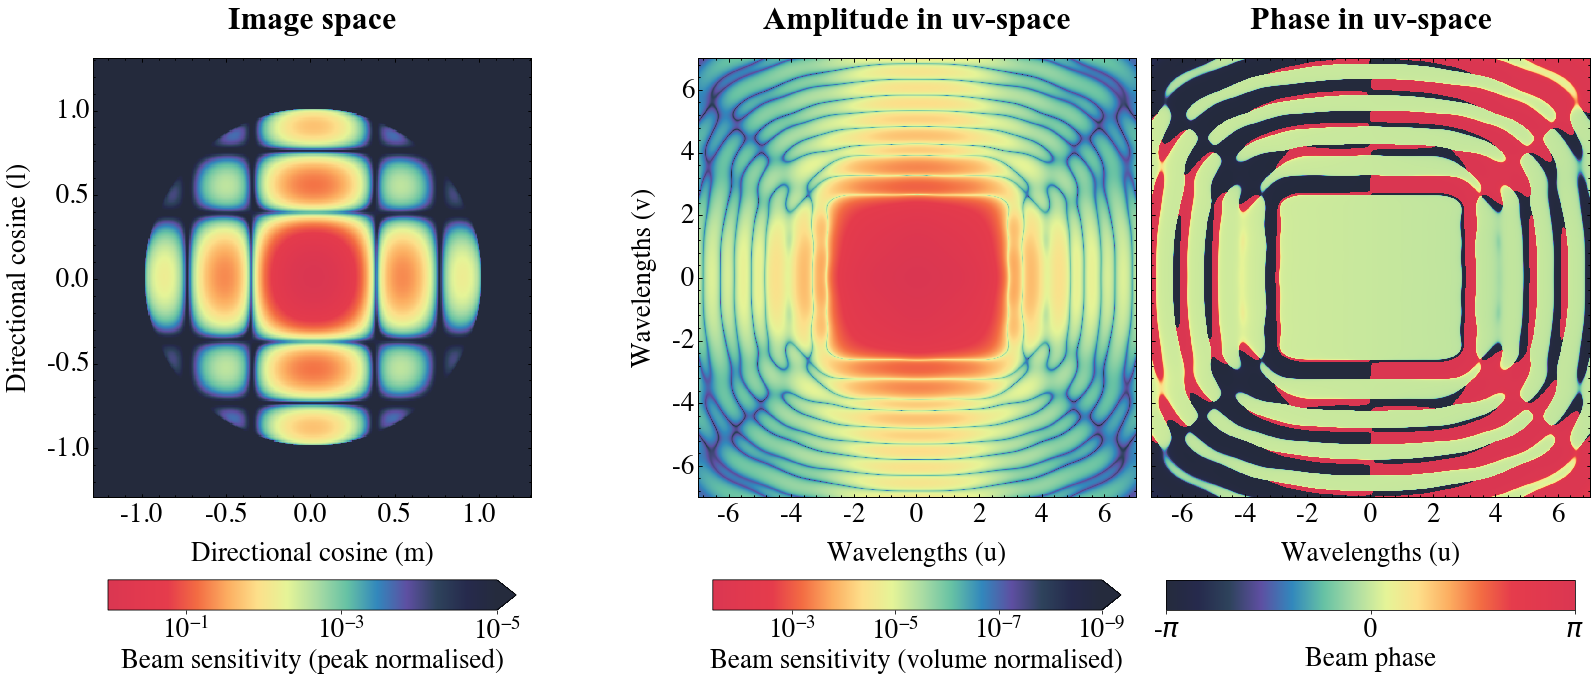

In [16]:
#Horizon control ONLY

fitslist = [dir_fits+'low_res/beam_uv_inst.header.fits',dir_fits+'low_res/beam_uv_atan_inst.header.fits']
fitslist_image = [dir_fits+'low_res/beam_image_inst.header.fits']

plot_save_name = 'instrument_compare_fft_font.pdf'

cmap_image=cb_spec#'Spectral_r'#'gnuplot2'#
cmap_uv_amp=cb_spec
cmap_uv_phase=cb_spec
vmax_image=1
vmin_image=1e-5
vmax_uv_amp=.035
vmin_uv_amp=1e-9
vmax_uv_phase=np.pi
vmin_uv_phase=-np.pi

#[xmin, ymin, dx, dy]

xmin1=0.1
xmin2=.5
xmin3=.8

subplot_loc_11 = [xmin1,.7,0.29,.29]
subplot_loc_12 = [xmin2,.7,0.29,.29]
subplot_loc_13 = [xmin3,0.7,0.29,.29]

subplot_loc_21 = [xmin1,.4,0.29,.29]
subplot_loc_22 = [xmin2,.4,0.29,.29]
subplot_loc_23 = [xmin3,.4,0.29,.29]

subplot_loc_31 = [xmin1,.1,0.29,.29]
subplot_loc_32 = [xmin2,.1,0.29,.29]
subplot_loc_33 = [xmin3,.1,0.29,.29]

font_size_axis = 27#22 (default font)
font_size_title = 32#25 (default font)
title_pad = 30 #in points

# Plot a 3x3 Figure

#Top left - Image control
fig = pl.figure(figsize=(21,21))
f1 = aplpy.FITSFigure(fitslist_image[0], figure=fig, subplot=subplot_loc_31)
f1.show_colorscale(cmap=cmap_image, stretch='log',vmin=vmin_image,vmax=vmax_image)
f1.axis_labels.set_ytext('Directional cosine (l)')
f1.axis_labels.set_xtext('Directional cosine (m)')
f1.axis_labels.set_font(family=font_name,size=font_size_axis)
f1.tick_labels.set_font(family=font_name,size=font_size_axis)
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')
f1.set_title('Image space',size=font_size_title,pad=title_pad,fontproperties=font_bold)

#Top middle - uv amp control
f2 = aplpy.FITSFigure(fitslist[0], figure=fig, subplot=subplot_loc_32)
f2.show_colorscale(cmap=cmap_uv_amp, stretch='log',vmin=vmin_uv_amp,vmax=vmax_uv_amp)
f2.axis_labels.set_ytext('Wavelengths (v)')
f2.axis_labels.set_xtext('Wavelengths (u)')
f2.axis_labels.set_font(family=font_name,size=font_size_axis)
f2.tick_labels.set_font(family=font_name,size=font_size_axis)
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')
f2.set_title('Amplitude in uv-space',size=font_size_title,pad=title_pad,fontproperties=font_bold)

#Top right - uv phase control
f3 = aplpy.FITSFigure(fitslist[1], figure=fig, subplot=subplot_loc_33)
f3.show_colorscale(cmap=cmap_uv_phase, stretch='linear',vmin=vmin_uv_phase,vmax=vmax_uv_phase)
f3.axis_labels.set_ytext('Wavelengths (v)')
f3.axis_labels.set_xtext('Wavelengths (u)')
f3.axis_labels.set_font(family=font_name,size=font_size_axis)
f3.tick_labels.set_font(family=font_name,size=font_size_axis)
f3.axis_labels.hide_y()
f3.tick_labels.hide_y()
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')
f3.set_title('Phase in uv-space',size=font_size_title,pad=title_pad,fontproperties=font_bold)

#Image space bar
#[left, bottom, width, height]
cbar_ax1 = fig.add_axes([xmin1+.01, 0.025, 0.27, 0.02])
cbar1 = pl.colorbar(pcm_image, cax=cbar_ax1,extend='min',orientation="horizontal")
cbar_ax1.invert_xaxis()
cbar1.set_label(label='Beam sensitivity (peak normalised)',size=font_size_axis,fontproperties=font)
for tick in cbar_ax1.xaxis.majorTicks:
    tick.label1.set_fontproperties(font)
cbar_ax1.tick_params(labelsize=font_size_axis)

#UV amp space bar
#[left, bottom, width, height]
cbar_ax2 = fig.add_axes([xmin2+.01, 0.025, 0.27, 0.02])
cbar2 = pl.colorbar(pcm_uv_amp, cax=cbar_ax2,extend='min',orientation="horizontal")
cbar_ax2.invert_xaxis()
cbar2.set_label(label='Beam sensitivity (volume normalised)',size=font_size_axis,fontproperties=font)
for tick in cbar_ax2.xaxis.majorTicks:
    tick.label1.set_fontproperties(font)
cbar_ax2.tick_params(labelsize=font_size_axis)

#UV phase space bar
#[left, bottom, width, height]
cbar_ax3 = fig.add_axes([xmin3+.01, 0.025, 0.27, 0.02])
cbar3 = pl.colorbar(pcm_uv_phase, cax=cbar_ax3,orientation="horizontal",ticks=[-np.pi, 0, np.pi])
#cbar_ax3.invert_xaxis()
cbar3.set_label(label='Beam phase',size=font_size_axis,fontproperties=font)
cbar_ax3.set_xticklabels([r'-$\pi$', '0', r'$\pi$'])
for tick in cbar_ax3.xaxis.majorTicks:
    tick.label1.set_fontproperties(font)
cbar_ax3.tick_params(labelsize=font_size_axis)



pl.savefig(dir_fits+plot_save_name, bbox_inches='tight', dpi=128)

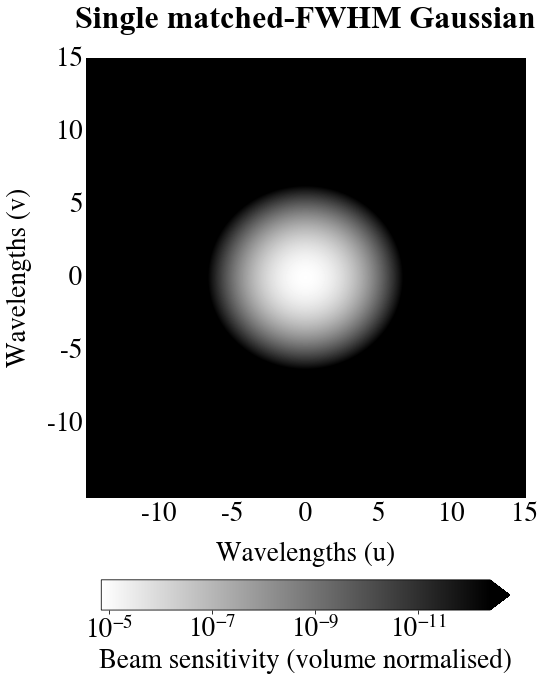

In [23]:
#Amp contours
#Python in general cannot make this figure all in one go, so it needs to be run in stages
#with removing countors and spliced in post-processing

ColorConverter.colors['e']=(94/256, 79/256, 162/256)
ColorConverter.colors['g']=(50/256, 136/256, 189/256)
ColorConverter.colors['h']=(102/256, 194/256, 165/256)
ColorConverter.colors['i']=(253/256, 174/256, 97/256)
ColorConverter.colors['j']=(219/256, 55/256, 82/256)

fitslist = [dir_fits+'beam_abs_large_'+d_type[0]+'_'+mask_type[0]+'.header.fits',
            dir_fits+'beam_abs_large_'+d_type[1]+'_'+mask_type[1]+'.header.fits',
            dir_fits+'beam_abs_large_'+d_type[2]+'_'+mask_type[2]+'.header.fits',
            dir_fits+'beam_phase_large_'+d_type[0]+'_'+mask_type[0]+'.header.fits',
            dir_fits+'beam_phase_large_'+d_type[1]+'_'+mask_type[1]+'.header.fits',
            dir_fits+'beam_phase_large_'+d_type[2]+'_'+mask_type[2]+'.header.fits']
fitslist_mask = [dir_fits+'beam_abs_large_'+d_type[0]+'_100000000_mask.header.fits',
            dir_fits+'beam_abs_large_'+d_type[0]+'_10000000_mask.header.fits',
            dir_fits+'beam_abs_large_'+d_type[0]+'_1000000_mask.header.fits',
            dir_fits+'beam_abs_large_'+d_type[0]+'_100000_mask.header.fits',
            dir_fits+'beam_abs_large_'+d_type[0]+'_10000_mask.header.fits',
            dir_fits+'beam_abs_large_'+d_type[1]+'_98000000_mask.header.fits',
            dir_fits+'beam_abs_large_'+d_type[1]+'_10000000_mask.header.fits',
            dir_fits+'beam_abs_large_'+d_type[1]+'_1113000_mask.header.fits',
            dir_fits+'beam_abs_large_'+d_type[1]+'_141886_mask.header.fits',
            dir_fits+'beam_abs_large_'+d_type[1]+'_1300_mask.header.fits',
            dir_fits+'beam_abs_large_'+d_type[2]+'_5200000_mask.header.fits',
            dir_fits+'beam_abs_large_'+d_type[2]+'_445000_mask.header.fits',
            dir_fits+'beam_abs_large_'+d_type[2]+'_50000_mask.header.fits',
            dir_fits+'beam_abs_large_'+d_type[2]+'_2750_mask.header.fits',
            dir_fits+'beam_abs_large_'+d_type[2]+'_160_mask.header.fits']
fitslist_image = [dir_fits+'beam_image_large_'+d_type[0]+'.header.fits',
            dir_fits+'beam_image_large_'+d_type[1]+'.header.fits',
            dir_fits+'beam_image_large_'+d_type[2]+'.header.fits']
kernel_names = ['Gaussian decomposition','Gaussian decomposition with half-power sidelobes',
                'Single matched-FWHM Gaussian']
plot_save_name = 'amp_contours_allgray_font3_fwhm.pdf'

cmap_image=cb_spec#'Spectral_r'#'gnuplot2'#
cmap_uv_amp=cb_spec
cmap_uv_phase=cb_spec
vmax_image=1
vmin_image=1e-5
vmax_uv_amp=1.4e-5 #.035
vmin_uv_amp=4e-13#1e-9
vmax_uv_phase=np.pi
vmin_uv_phase=-np.pi

#[xmin, ymin, dx, dy]

xmin1=0.1
xmin2=.4
xmin3=.7

subplot_loc_11 = [xmin1,.7,0.29,.29]
subplot_loc_12 = [xmin2,.7,0.29,.29]
subplot_loc_13 = [xmin3,0.7,0.29,.29]

subplot_loc_21 = [xmin1,.4,0.29,.29]
subplot_loc_22 = [xmin2,.4,0.29,.29]
subplot_loc_23 = [xmin3,.4,0.29,.29]

subplot_loc_31 = [xmin1,.1,0.29,.29]
subplot_loc_32 = [xmin2,.1,0.29,.29]
subplot_loc_33 = [xmin3,.1,0.29,.29]

font_size_axis = 27#22 (default font)
font_size_title = 32#25 (default font)
title_pad = 30 #in points



# Plot a 3x3 Figure

#Top middle - uv amp control
fig = pl.figure(figsize=(21,21))
# f1 = aplpy.FITSFigure(fitslist[0], figure=fig, subplot=subplot_loc_31)
# f1.show_colorscale(cmap='gray', stretch='log',vmin=vmin_uv_amp,vmax=vmax_uv_amp)
# f1.axis_labels.set_ytext('Wavelengths (v)')
# f1.axis_labels.set_xtext('Wavelengths (u)')
# f1.axis_labels.set_font(family=font_name,size=font_size_axis)
# f1.tick_labels.set_font(family=font_name,size=font_size_axis)
# #f1.show_contour(fitslist_mask[0],colors='e',levels=[1.],linewidths=4)
# #f1.show_contour(fitslist_mask[1],colors='g',levels=[1.],linewidths=4)
# #f1.show_contour(fitslist_mask[2],colors='h',levels=[1.],linewidths=4)
# #f1.show_contour(fitslist_mask[3],colors='i',levels=[1.],linewidths=4)
# #f1.show_contour(fitslist_mask[4],colors='j',levels=[1.],linewidths=4)
# a=pl.gca()
# a.tick_params(direction='in', color='k', which='both')
# f1.set_title(kernel_names[0],size=font_size_title,pad=title_pad,fontproperties=font_bold)

#Top middle - uv amp control
# f2 = aplpy.FITSFigure(fitslist[1], figure=fig, subplot=subplot_loc_32)
# f2.show_colorscale(cmap='gray', stretch='log',vmin=vmin_uv_amp,vmax=vmax_uv_amp)
# f2.axis_labels.set_ytext('Wavelengths (v)')
# f2.axis_labels.set_xtext('Wavelengths (u)')
# f2.axis_labels.set_font(family=font_name,size=font_size_axis)
# f2.tick_labels.set_font(family=font_name,size=font_size_axis)
# #f2.axis_labels.hide_y()
# #f2.tick_labels.hide_y()
# #f2.show_contour(fitslist_mask[5],colors='e',levels=[1.],linewidths=4)
# #f2.show_contour(fitslist_mask[6],colors='g',levels=[1.],linewidths=4)
# #f2.show_contour(fitslist_mask[7],colors='h',levels=[1.],linewidths=4)
# #f2.show_contour(fitslist_mask[8],colors='i',levels=[1.],linewidths=4)
# #f2.show_contour(fitslist_mask[9],colors='j',levels=[1.],linewidths=4)
# a=pl.gca()
# a.tick_params(direction='in', color='k', which='both')
# f2.set_title('Gaussian decomposition\nwith half-power sidelobes',multialignment='center',
#              size=font_size_title,pad=title_pad,fontproperties=font_bold)

#Top right - uv phase control
f3 = aplpy.FITSFigure(fitslist[2], figure=fig, subplot=subplot_loc_33)
f3.show_colorscale(cmap='gray', stretch='log',vmin=vmin_uv_amp,vmax=vmax_uv_amp)
f3.axis_labels.set_ytext('Wavelengths (v)')
f3.axis_labels.set_xtext('Wavelengths (u)')
f3.axis_labels.set_font(family=font_name,size=font_size_axis)
f3.tick_labels.set_font(family=font_name,size=font_size_axis)
#f3.axis_labels.hide_y()
#f3.tick_labels.hide_y()
#f3.show_contour(fitslist_mask[10],colors='e',levels=[1.],linewidths=4)
#f3.show_contour(fitslist_mask[11],colors='g',levels=[1.],linewidths=4)
#f3.show_contour(fitslist_mask[12],colors='h',levels=[1.],linewidths=4)
#f3.show_contour(fitslist_mask[13],colors='i',levels=[1.],linewidths=4)
#f3.show_contour(fitslist_mask[14],colors='j',levels=[1.],linewidths=4)
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')
f3.set_title(kernel_names[2],size=font_size_title,pad=title_pad,fontproperties=font_bold)


#cbar_ax1 = fig.add_axes([.3, 0.025, 0.5, 0.02])
cbar_ax1 = fig.add_axes([xmin3+.01, 0.025, 0.27, 0.02])
cbar1 = pl.colorbar(pcm_uv_gray, cax=cbar_ax1,extend='min',orientation="horizontal")
cbar_ax1.invert_xaxis()
cbar1.set_label(label='Beam sensitivity (volume normalised)',size=font_size_axis,fontproperties=font)
for tick in cbar_ax1.xaxis.majorTicks:
    tick.label1.set_fontproperties(font)
cbar_ax1.tick_params(labelsize=font_size_axis)

pl.savefig(dir_fits+plot_save_name, bbox_inches='tight', dpi=128)

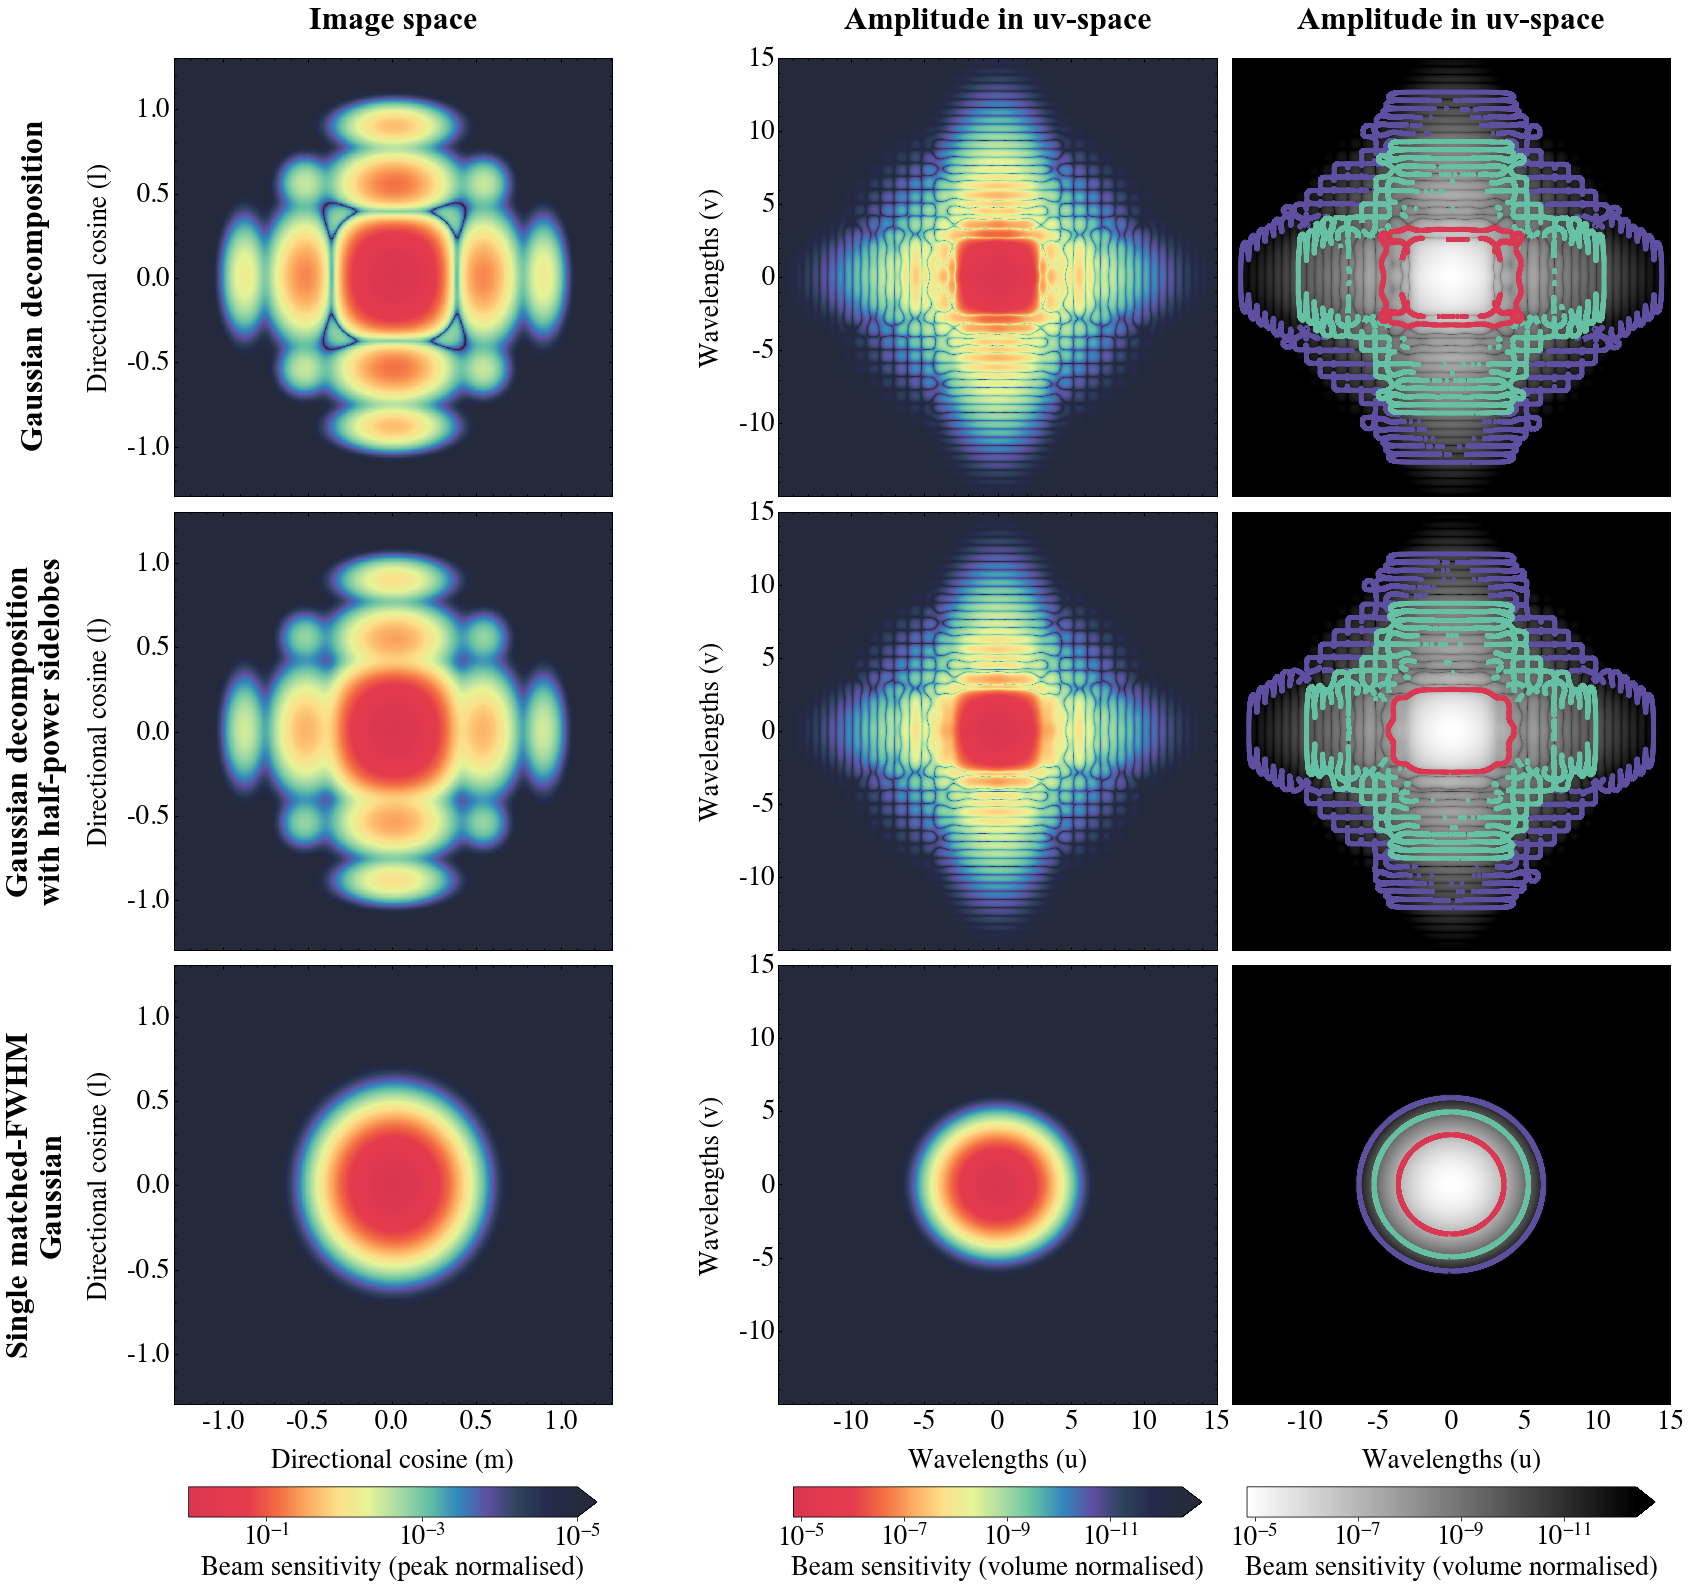

In [4]:
#FULL PANEL
key = 'large'

fitslist = [dir_fits+'beam_abs_'+key+'_'+d_type[0]+'_'+mask_type[0]+'.header.fits',
            dir_fits+'beam_abs_'+key+'_'+d_type[1]+'_'+mask_type[1]+'.header.fits',
            dir_fits+'beam_abs_'+key+'_'+d_type[2]+'_'+mask_type[2]+'.header.fits',
            dir_fits+'beam_phase_'+key+'_'+d_type[0]+'_'+mask_type[0]+'.header.fits',
            dir_fits+'beam_phase_'+key+'_'+d_type[1]+'_'+mask_type[1]+'.header.fits',
            dir_fits+'beam_phase_'+key+'_'+d_type[2]+'_'+mask_type[2]+'.header.fits']
dir_mask = '/Volumes/T7/MWA/data/beam_fits/'
fitslist_mask = [dir_mask+'beam_abs_large_'+d_type[0]+'_100000000_mask.header.fits',
            dir_mask+'beam_abs_large_'+d_type[0]+'_1000000_mask.header.fits',
            dir_mask+'beam_abs_large_'+d_type[0]+'_10000_mask.header.fits',
            dir_mask+'beam_abs_large_'+d_type[1]+'_98000000_mask.header.fits',
            dir_mask+'beam_abs_large_'+d_type[1]+'_1113000_mask.header.fits',
            dir_mask+'beam_abs_large_'+d_type[1]+'_1300_mask.header.fits',
            dir_mask+'beam_abs_large_'+d_type[2]+'_5200000_mask.header.fits',
            dir_mask+'beam_abs_large_'+d_type[2]+'_50000_mask.header.fits',
            dir_mask+'beam_abs_large_'+d_type[2]+'_160_mask.header.fits']
fitslist_image = [dir_fits+'beam_image_'+key+'_'+d_type[0]+'.header.fits',
            dir_fits+'beam_image_'+key+'_'+d_type[1]+'.header.fits',
            dir_fits+'beam_image_'+key+'_'+d_type[2]+'.header.fits']
kernel_names = ['Gaussian decomposition','Gaussian decomposition with half-power sidelobes',
                'Single matched-FWHM Gaussian']
plot_save_name = 'panel_highres_withgrey_font_vol1.pdf'

cmap_image=cb_spec#'Spectral_r'#'gnuplot2'#
cmap_uv_amp=cb_spec
cmap_uv_phase=cb_spec
vmax_image=1
vmin_image=1e-5
vmax_uv_amp=1.4e-5 #.035
vmin_uv_amp=4e-13#1e-9
vmax_uv_phase=np.pi
vmin_uv_phase=-np.pi

#[xmin, ymin, dx, dy]

xmin1=0.1
xmin2=.5
xmin3=.8

subplot_loc_11 = [xmin1,.7,0.29,.29]
subplot_loc_12 = [xmin2,.7,0.29,.29]
subplot_loc_13 = [xmin3,0.7,0.29,.29]

subplot_loc_21 = [xmin1,.4,0.29,.29]
subplot_loc_22 = [xmin2,.4,0.29,.29]
subplot_loc_23 = [xmin3,.4,0.29,.29]

subplot_loc_31 = [xmin1,.1,0.29,.29]
subplot_loc_32 = [xmin2,.1,0.29,.29]
subplot_loc_33 = [xmin3,.1,0.29,.29]

font_size_axis = 27#22 (default font)
font_size_title = 32#25 (default font)
title_pad = 30 #in points

Timesfont_bold=matplotlib.font_manager.FontProperties(family='Times New Roman', style='normal', size=12, weight='bold', stretch='normal')
Timesfont=matplotlib.font_manager.FontProperties(family='Times', style='normal', size=12, weight='normal', stretch='normal')
ticks_font = matplotlib.font_manager.FontProperties(family='Times', style='normal', size=12, weight='normal', stretch='normal')


# Plot a 3x3 Figure

#Top left - Image control
fig = pl.figure(figsize=(21,21))
f1 = aplpy.FITSFigure(fitslist_image[0], figure=fig, subplot=subplot_loc_11)
f1.show_colorscale(cmap=cmap_image, stretch='log',vmin=vmin_image,vmax=vmax_image)
f1.axis_labels.set_ytext('Directional cosine (l)')
f1.axis_labels.set_xtext('Directional cosine (m)')
f1.axis_labels.set_font(family=font_name,size=font_size_axis)
f1.tick_labels.set_font(family=font_name,size=font_size_axis)
f1.axis_labels.hide_x()
f1.tick_labels.hide_x()
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')
f1.set_title('Image space',size=font_size_title,pad=title_pad,fontproperties=font_bold)

#Top middle - uv amp control
f2 = aplpy.FITSFigure(fitslist[0], figure=fig, subplot=subplot_loc_12)
f2.show_colorscale(cmap=cmap_uv_amp, stretch='log',vmin=vmin_uv_amp,vmax=vmax_uv_amp)
f2.axis_labels.set_ytext('Wavelengths (v)')
f2.axis_labels.set_xtext('Wavelengths (u)')
f2.axis_labels.set_font(family=font_name,size=font_size_axis)
f2.tick_labels.set_font(family=font_name,size=font_size_axis)
f2.axis_labels.hide_x()
f2.tick_labels.hide_x()
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')
f2.set_title('Amplitude in uv-space',size=font_size_title,pad=title_pad,fontproperties=font_bold)

#Top right - uv amp gray control
f3 = aplpy.FITSFigure(fitslist[0], figure=fig, subplot=subplot_loc_13)
f3.show_colorscale(cmap='gray', stretch='log',vmin=vmin_uv_amp,vmax=vmax_uv_amp)
f3.axis_labels.set_ytext('Wavelengths (v)')
f3.axis_labels.set_xtext('Wavelengths (u)')
f3.axis_labels.set_font(family=font_name,size=font_size_axis)
f3.tick_labels.set_font(family=font_name,size=font_size_axis)
f3.axis_labels.hide_y()
f3.tick_labels.hide_y()
f3.axis_labels.hide_x()
f3.tick_labels.hide_x()
f3.show_contour(fitslist_mask[0],colors='e',levels=[1.],linewidths=5)
f3.show_contour(fitslist_mask[1],colors='h',levels=[1.],linewidths=5)
f3.show_contour(fitslist_mask[2],colors='j',levels=[1.],linewidths=5)
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')
f3.set_title('Amplitude in uv-space',size=font_size_title,pad=title_pad,fontproperties=font_bold)

#Middle left - Image 50%
#fig = pl.figure(figsize=(21,8))
f1 = aplpy.FITSFigure(fitslist_image[1], figure=fig, subplot=subplot_loc_21)
f1.show_colorscale(cmap=cmap_image, stretch='log',vmin=vmin_image,vmax=vmax_image)
f1.axis_labels.set_ytext('Directional cosine (l)')
f1.axis_labels.set_xtext('Directional cosine (m)')
f1.axis_labels.set_font(family=font_name,size=font_size_axis)
f1.tick_labels.set_font(family=font_name,size=font_size_axis)
f1.axis_labels.hide_x()
f1.tick_labels.hide_x()
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')
#f1.set_title(kernel_names[0],size=18)

#Middle middle - uv amp 50%
f2 = aplpy.FITSFigure(fitslist[1], figure=fig, subplot=subplot_loc_22)
f2.show_colorscale(cmap=cmap_uv_amp, stretch='log',vmin=vmin_uv_amp,vmax=vmax_uv_amp)
f2.axis_labels.set_ytext('Wavelengths (v)')
f2.axis_labels.set_xtext('Wavelengths (u)')
f2.axis_labels.set_font(family=font_name,size=font_size_axis)
f2.tick_labels.set_font(family=font_name,size=font_size_axis)
f2.axis_labels.hide_x()
f2.tick_labels.hide_x()
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')
#f2.set_title(kernel_names[1],size=18)

#Middle right - uv amp 50%
f3 = aplpy.FITSFigure(fitslist[1], figure=fig, subplot=subplot_loc_23)
f3.show_colorscale(cmap='gray', stretch='log',vmin=vmin_uv_amp,vmax=vmax_uv_amp)
f3.axis_labels.set_ytext('Wavelengths (v)')
f3.axis_labels.set_xtext('Wavelengths (u)')
f3.axis_labels.set_font(family=font_name,size=font_size_axis)
f3.tick_labels.set_font(family=font_name,size=font_size_axis)
f3.axis_labels.hide_y()
f3.tick_labels.hide_y()
f3.axis_labels.hide_x()
f3.tick_labels.hide_x()
f3.show_contour(fitslist_mask[3],colors='e',levels=[1.],linewidths=5)
f3.show_contour(fitslist_mask[4],colors='h',levels=[1.],linewidths=5)
f3.show_contour(fitslist_mask[5],colors='j',levels=[1.],linewidths=5)
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')
#f3.set_title(kernel_names[2],size=18)

#Bottom left - Image fwhm
#fig = pl.figure(figsize=(21,8))
f1 = aplpy.FITSFigure(fitslist_image[2], figure=fig, subplot=subplot_loc_31)
f1.show_colorscale(cmap=cmap_image, stretch='log',vmin=vmin_image,vmax=vmax_image)
f1.axis_labels.set_ytext('Directional cosine (l)')
f1.axis_labels.set_xtext('Directional cosine (m)')
f1.axis_labels.set_font(family=font_name,size=font_size_axis)
f1.tick_labels.set_font(family=font_name,size=font_size_axis)
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')
#f1.set_title(kernel_names[0],size=18)

#Bottom middle - uv amp fwhm
f2 = aplpy.FITSFigure(fitslist[2], figure=fig, subplot=subplot_loc_32)
f2.show_colorscale(cmap=cmap_uv_amp, stretch='log',vmin=vmin_uv_amp,vmax=vmax_uv_amp)
f2.axis_labels.set_ytext('Wavelengths (v)')
f2.axis_labels.set_xtext('Wavelengths (u)')
f2.axis_labels.set_font(family=font_name,size=font_size_axis)
f2.tick_labels.set_font(family=font_name,size=font_size_axis)
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')
#f2.set_title(kernel_names[1],size=18)

#Bottom right - uv phase fwhm
f3 = aplpy.FITSFigure(fitslist[2], figure=fig, subplot=subplot_loc_33)
f3.show_colorscale(cmap='gray', stretch='log',vmin=vmin_uv_amp,vmax=vmax_uv_amp)
f3.axis_labels.set_ytext('Wavelengths (v)')
f3.axis_labels.set_xtext('Wavelengths (u)')
f3.axis_labels.set_font(family=font_name,size=font_size_axis)
f3.tick_labels.set_font(family=font_name,size=font_size_axis)
f3.axis_labels.hide_y()
f3.tick_labels.hide_y()
f3.show_contour(fitslist_mask[6],colors='e',levels=[1.],linewidths=5)
f3.show_contour(fitslist_mask[7],colors='h',levels=[1.],linewidths=5)
f3.show_contour(fitslist_mask[8],colors='j',levels=[1.],linewidths=5)
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')
#f3.set_title(kernel_names[2],size=18)

#[left, bottom, right, top]
#pl.tight_layout(rect=[0, 0, .7, .7])
#pl.subplots_adjust(right=0.85)


#Image space bar
#[left, bottom, width, height]
cbar_ax1 = fig.add_axes([xmin1+.01, 0.025, 0.27, 0.02])
cbar1 = pl.colorbar(pcm_image, cax=cbar_ax1,extend='min',orientation="horizontal")
cbar_ax1.invert_xaxis()
cbar1.set_label(label='Beam sensitivity (peak normalised)',size=font_size_axis,fontproperties=font)
for tick in cbar_ax1.xaxis.majorTicks:
    tick.label1.set_fontproperties(font)
cbar_ax1.tick_params(labelsize=font_size_axis)

#UV amp space bar
#[left, bottom, width, height]
cbar_ax2 = fig.add_axes([xmin2+.01, 0.025, 0.27, 0.02])
cbar2 = pl.colorbar(pcm_uv_amp, cax=cbar_ax2,extend='min',orientation="horizontal")
cbar_ax2.invert_xaxis()
cbar2.set_label(label='Beam sensitivity (volume normalised)',size=font_size_axis,fontproperties=font)
for tick in cbar_ax2.xaxis.majorTicks:
    tick.label1.set_fontproperties(font)
cbar_ax2.tick_params(labelsize=font_size_axis)

#UV amp space bar greay
#[left, bottom, width, height]
cbar_ax3 = fig.add_axes([xmin3+.01, 0.025, 0.27, 0.02])
cbar3 = pl.colorbar(pcm_uv_gray, cax=cbar_ax3,extend='min',orientation="horizontal")
cbar_ax3.invert_xaxis()
cbar3.set_label(label='Beam sensitivity (volume normalised)',size=font_size_axis,fontproperties=font)
for tick in cbar_ax3.xaxis.majorTicks:
    tick.label1.set_fontproperties(font)
cbar_ax3.tick_params(labelsize=font_size_axis)

#Add labels
#label_ax = fig.add_axes([0,0,1,1])
fig.text(0, .735, 'Gaussian decomposition',rotation='vertical',fontsize=font_size_title,fontproperties=font_bold)
fig.text(-0.01, .435, 'Gaussian decomposition\nwith half-power sidelobes',rotation='vertical',
         fontsize=font_size_title,multialignment='center',fontproperties=font_bold)
fig.text(-0.01, .135, 'Single matched-FWHM\nGaussian',rotation='vertical',
         multialignment='center',fontsize=font_size_title,fontproperties=font_bold)

#Add FT arrows (x, y, dx, dy)
#f3.show_arrows(.3, .8, .1, .03)


pl.savefig(dir_fits+plot_save_name, bbox_inches='tight', dpi=128)

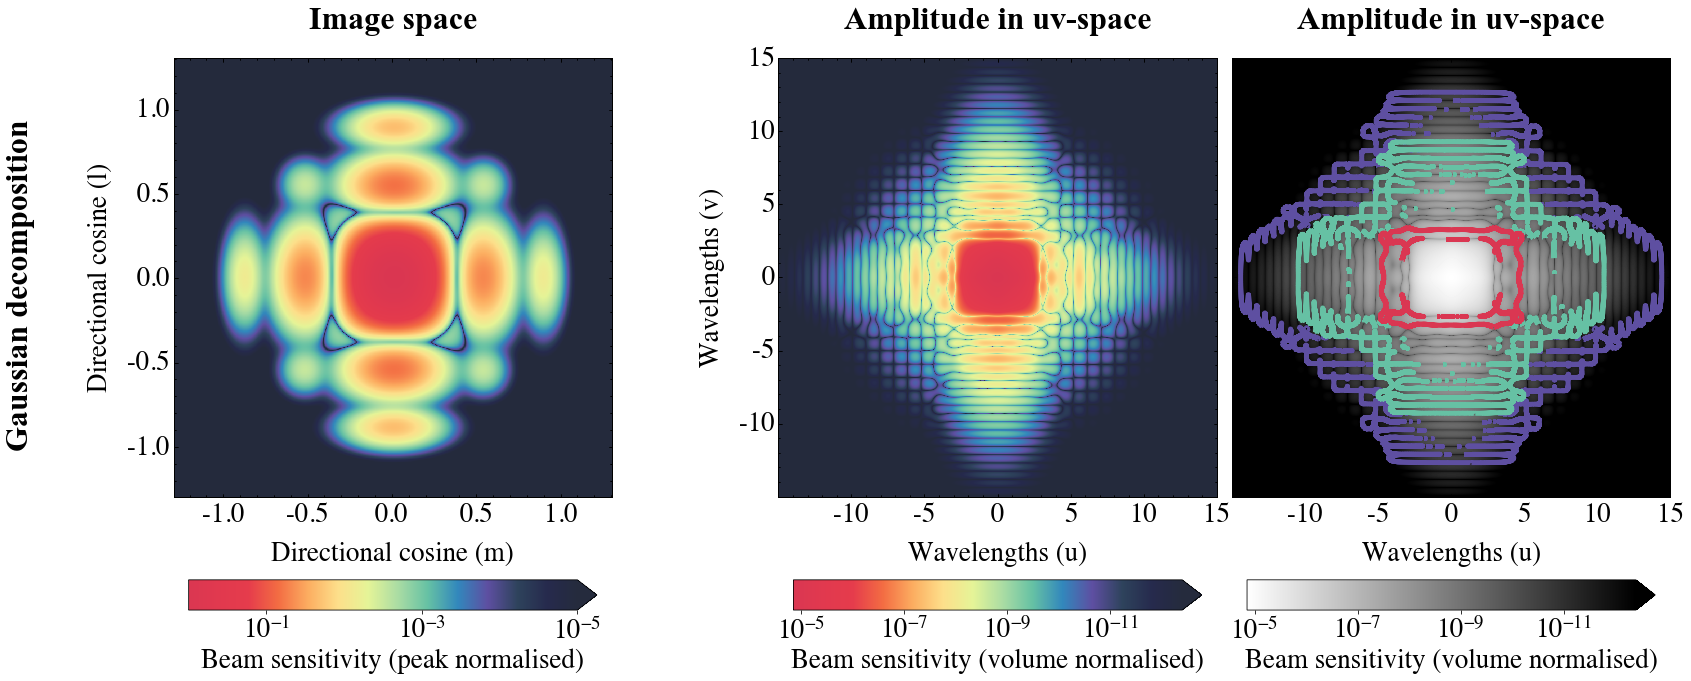

In [7]:
#top row only
key = 'large'

fitslist = [dir_fits+'beam_abs_'+key+'_'+d_type[0]+'_'+mask_type[0]+'.header.fits',
            dir_fits+'beam_abs_'+key+'_'+d_type[1]+'_'+mask_type[1]+'.header.fits',
            dir_fits+'beam_abs_'+key+'_'+d_type[2]+'_'+mask_type[2]+'.header.fits',
            dir_fits+'beam_phase_'+key+'_'+d_type[0]+'_'+mask_type[0]+'.header.fits',
            dir_fits+'beam_phase_'+key+'_'+d_type[1]+'_'+mask_type[1]+'.header.fits',
            dir_fits+'beam_phase_'+key+'_'+d_type[2]+'_'+mask_type[2]+'.header.fits']
dir_mask = '/Volumes/T7/MWA/data/beam_fits/'
fitslist_mask = [dir_mask+'beam_abs_large_'+d_type[0]+'_100000000_mask.header.fits',
            dir_mask+'beam_abs_large_'+d_type[0]+'_1000000_mask.header.fits',
            dir_mask+'beam_abs_large_'+d_type[0]+'_10000_mask.header.fits',
            dir_mask+'beam_abs_large_'+d_type[1]+'_98000000_mask.header.fits',
            dir_mask+'beam_abs_large_'+d_type[1]+'_1113000_mask.header.fits',
            dir_mask+'beam_abs_large_'+d_type[1]+'_1300_mask.header.fits',
            dir_mask+'beam_abs_large_'+d_type[2]+'_5200000_mask.header.fits',
            dir_mask+'beam_abs_large_'+d_type[2]+'_50000_mask.header.fits',
            dir_mask+'beam_abs_large_'+d_type[2]+'_160_mask.header.fits']
fitslist_image = [dir_fits+'beam_image_'+key+'_'+d_type[0]+'.header.fits',
            dir_fits+'beam_image_'+key+'_'+d_type[1]+'.header.fits',
            dir_fits+'beam_image_'+key+'_'+d_type[2]+'.header.fits']
kernel_names = ['Gaussian decomposition','Gaussian decomposition with half-power sidelobes',
                'Single matched-FWHM Gaussian']
plot_save_name = 'toprow_highres_withgrey_font_vol1.pdf'

cmap_image=cb_spec#'Spectral_r'#'gnuplot2'#
cmap_uv_amp=cb_spec
cmap_uv_phase=cb_spec
vmax_image=1
vmin_image=1e-5
vmax_uv_amp=1.4e-5 #.035
vmin_uv_amp=4e-13#1e-9
vmax_uv_phase=np.pi
vmin_uv_phase=-np.pi

#[xmin, ymin, dx, dy]

xmin1=0.1
xmin2=.5
xmin3=.8

subplot_loc_11 = [xmin1,.7,0.29,.29]
subplot_loc_12 = [xmin2,.7,0.29,.29]
subplot_loc_13 = [xmin3,0.7,0.29,.29]

subplot_loc_21 = [xmin1,.4,0.29,.29]
subplot_loc_22 = [xmin2,.4,0.29,.29]
subplot_loc_23 = [xmin3,.4,0.29,.29]

subplot_loc_31 = [xmin1,.1,0.29,.29]
subplot_loc_32 = [xmin2,.1,0.29,.29]
subplot_loc_33 = [xmin3,.1,0.29,.29]

font_size_axis = 27#22 (default font)
font_size_title = 32#25 (default font)
title_pad = 30 #in points

Timesfont_bold=matplotlib.font_manager.FontProperties(family='Times New Roman', style='normal', size=12, weight='bold', stretch='normal')
Timesfont=matplotlib.font_manager.FontProperties(family='Times', style='normal', size=12, weight='normal', stretch='normal')
ticks_font = matplotlib.font_manager.FontProperties(family='Times', style='normal', size=12, weight='normal', stretch='normal')


# Plot a 3x3 Figure

#Top left - Image control
fig = pl.figure(figsize=(21,21))
f1 = aplpy.FITSFigure(fitslist_image[0], figure=fig, subplot=subplot_loc_31)
f1.show_colorscale(cmap=cmap_image, stretch='log',vmin=vmin_image,vmax=vmax_image)
f1.axis_labels.set_ytext('Directional cosine (l)')
f1.axis_labels.set_xtext('Directional cosine (m)')
f1.axis_labels.set_font(family=font_name,size=font_size_axis)
f1.tick_labels.set_font(family=font_name,size=font_size_axis)
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')
f1.set_title('Image space',size=font_size_title,pad=title_pad,fontproperties=font_bold)

#Top middle - uv amp control
f2 = aplpy.FITSFigure(fitslist[0], figure=fig, subplot=subplot_loc_32)
f2.show_colorscale(cmap=cmap_uv_amp, stretch='log',vmin=vmin_uv_amp,vmax=vmax_uv_amp)
f2.axis_labels.set_ytext('Wavelengths (v)')
f2.axis_labels.set_xtext('Wavelengths (u)')
f2.axis_labels.set_font(family=font_name,size=font_size_axis)
f2.tick_labels.set_font(family=font_name,size=font_size_axis)
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')
f2.set_title('Amplitude in uv-space',size=font_size_title,pad=title_pad,fontproperties=font_bold)

#Top right - uv amp gray control
f3 = aplpy.FITSFigure(fitslist[0], figure=fig, subplot=subplot_loc_33)
f3.show_colorscale(cmap='gray', stretch='log',vmin=vmin_uv_amp,vmax=vmax_uv_amp)
f3.axis_labels.set_ytext('Wavelengths (v)')
f3.axis_labels.set_xtext('Wavelengths (u)')
f3.axis_labels.set_font(family=font_name,size=font_size_axis)
f3.tick_labels.set_font(family=font_name,size=font_size_axis)
f3.axis_labels.hide_y()
f3.tick_labels.hide_y()
f3.show_contour(fitslist_mask[0],colors='e',levels=[1.],linewidths=5)
f3.show_contour(fitslist_mask[1],colors='h',levels=[1.],linewidths=5)
f3.show_contour(fitslist_mask[2],colors='j',levels=[1.],linewidths=5)
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')
f3.set_title('Amplitude in uv-space',size=font_size_title,pad=title_pad,fontproperties=font_bold)


#Image space bar
#[left, bottom, width, height]
cbar_ax1 = fig.add_axes([xmin1+.01, 0.025, 0.27, 0.02])
cbar1 = pl.colorbar(pcm_image, cax=cbar_ax1,extend='min',orientation="horizontal")
cbar_ax1.invert_xaxis()
cbar1.set_label(label='Beam sensitivity (peak normalised)',size=font_size_axis,fontproperties=font)
for tick in cbar_ax1.xaxis.majorTicks:
    tick.label1.set_fontproperties(font)
cbar_ax1.tick_params(labelsize=font_size_axis)

#UV amp space bar
#[left, bottom, width, height]
cbar_ax2 = fig.add_axes([xmin2+.01, 0.025, 0.27, 0.02])
cbar2 = pl.colorbar(pcm_uv_amp, cax=cbar_ax2,extend='min',orientation="horizontal")
cbar_ax2.invert_xaxis()
cbar2.set_label(label='Beam sensitivity (volume normalised)',size=font_size_axis,fontproperties=font)
for tick in cbar_ax2.xaxis.majorTicks:
    tick.label1.set_fontproperties(font)
cbar_ax2.tick_params(labelsize=font_size_axis)

#UV amp space bar greay
#[left, bottom, width, height]
cbar_ax3 = fig.add_axes([xmin3+.01, 0.025, 0.27, 0.02])
cbar3 = pl.colorbar(pcm_uv_gray, cax=cbar_ax3,extend='min',orientation="horizontal")
cbar_ax3.invert_xaxis()
cbar3.set_label(label='Beam sensitivity (volume normalised)',size=font_size_axis,fontproperties=font)
for tick in cbar_ax3.xaxis.majorTicks:
    tick.label1.set_fontproperties(font)
cbar_ax3.tick_params(labelsize=font_size_axis)

#Add labels
#label_ax = fig.add_axes([0,0,1,1])
fig.text(-0.01, .135, 'Gaussian decomposition',rotation='vertical',fontsize=font_size_title,fontproperties=font_bold)

#Add FT arrows (x, y, dx, dy)
#f3.show_arrows(.3, .8, .1, .03)


pl.savefig(dir_fits+plot_save_name, bbox_inches='tight', dpi=128)